# Project Introduction to Neural Networks ReneWind
**By Ankush Waghmare**

# **Business Context**
Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S. Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

# **Objective**
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data on generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set, and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators can be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

*   True positives (TP) are failures correctly predicted by the model. These will result in repair costs.
*   False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
*   False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variable should be considered as “failure” and “0” represents “No failure”.

# **Data Dictionary**
The data provided is a transformed version of the original data which was collected using sensors.
*   Train.csv - To be used for training and tuning of models.
*   Test.csv - To be used only for testing the performance of the final best model.

Both datasets consist of 40 predictor variables and 1 target variable.


## Installing and Importing necessary libraries

In [172]:
#Installing the libraries with the specified version.
!pip install tensorflow==2.18.0 scikit-learn==1.3.2 matplotlib==3.8.0 seaborn==0.13.1 numpy==1.26.0 pandas==2.2.2 protobuf==5.29.1 -q --user --no-warn-script-location

In [240]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import time

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense,Dropout,BatchNormalization   # for creating fully connected neural network layers.
from tensorflow.keras.utils import to_categorical
tf.compat.v1.enable_eager_execution()

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [174]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

### Loading the dataset from google drive

In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
# loading the dataset
Testdata = pd.read_csv("/content/drive/MyDrive/Great Learning AIML course/4th Month Neural Networks/Project 4: Introduction to Neural Networks - ReneWind/Test.csv")
Traindata = pd.read_csv("/content/drive/MyDrive/Great Learning AIML course/4th Month Neural Networks/Project 4: Introduction to Neural Networks - ReneWind/Train.csv")


## Data Overview

## Displaying the first few rows of the dataset

In [ ]:
Testdata.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.613489 -3.819640  2.202302  1.300420 -1.184929 -4.495964 -1.835817   
1  0.389608 -0.512341  0.527053 -2.576776 -1.016766  2.235112 -0.441301   
2 -0.874861 -0.640632  4.084202 -1.590454  0.525855 -1.957592 -0.695367   
3  0.238384  1.458607  4.014528  2.534478  1.196987 -3.117330 -0.924035   
4  5.828225  2.768260 -1.234530  2.809264 -1.641648 -1.406698  0.568643   

         V8        V9       V10       V11       V12       V13       V14  \
0  4.722989  1.206140 -0.341909 -5.122874  1.017021  4.818549  3.269001   
1 -4.405744 -0.332869  1.966794  1.796544  0.410490  0.638328 -1.389600   
2  1.347309 -1.732348  0.466500 -4.928214  3.565070 -0.449329 -0.656246   
3  0.269493  1.322436  0.702345 -5.578345 -0.850662  2.590525  0.767418   
4  0.965043  1.918379 -2.774855 -0.530016  1.374544 -0.650941 -1.679466   

        V15       V16       V17       V18       V19       V20       V21  \
0 -2.984330  1.387370  2.032002 -0.511587 -1.023069  7.338733 -2.242244   
1 -1.883410 -5.017922 -3.827238  2.418060  1.762285 -3.242297 -3.192960   
2 -0.166537 -1.630207  2.291865  2.396492  0.601278  1.793534 -2.120238   
3 -2.390809 -2.341961  0.571875 -0.933751  0.508677  1.210715 -3.259524   
4 -0.379220 -4.443143  3.893857 -0.607640  2.944931  0.367233 -5.789081   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.155489  2.053786 -2.772273  1.851369 -1.788696 -0.277282 -1.255143   
1  1.857454 -1.707954  0.633444 -0.587898  0.083683  3.013935 -0.182309   
2  0.481968 -0.840707  1.790197  1.874395  0.363930 -0.169063 -0.483832   
3  0.104587 -0.658875  1.498107  1.100305  4.142988 -0.248446 -1.136516   
4  4.597528  4.450264  3.224941  0.396701  0.247765 -2.362047  1.079378   

        V29       V30       V31       V32       V33       V34       V35  \
0 -3.832886 -1.504542  1.586765  2.291204 -5.411388  0.870073  0.574479   
1  0.223917  0.865228 -1.782158 -2.474936  2.493582  0.315165  2.059288   
2 -2.118982 -2.156586  2.907291 -1.318888 -2.997464  0.459664  0.619774   
3 -5.355810 -4.545931  3.808667  3.517918 -3.074085 -0.284220  0.954576   
4 -0.473076  2.242810 -3.591421  1.773841 -1.501573 -2.226702  4.776830   

        V36       V37        V38       V39       V40  Target  
0  4.157191  1.428093 -10.511342  0.454664 -1.448363       0  
1  0.683859 -0.485452   5.128350  1.720744 -1.488235       0  
2  5.631504  1.323512  -1.752154  1.808302  1.675748       0  
3  3.029331 -1.367198  -3.412140  0.906000 -2.450889       0  
4 -6.559698 -0.805551  -0.276007 -3.858207 -0.537694       0

In [ ]:
Traindata.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
2 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   
3  1.618098  1.888342  7.046143 -1.147285  0.083080 -1.529780  0.207309   
4 -0.111440  3.872488 -3.758361 -2.982897  3.792714  0.544960  0.205433   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.050714 -1.522351  3.761892 -5.714719  0.735893  0.981251  1.417884   
1 -4.332135  0.565695 -0.101080  1.914465 -0.951458 -1.255259 -2.706522   
2 -3.173204 -2.081860  5.392621 -0.770673  1.106718  1.144261  0.943301   
3 -2.493629  0.344926  2.118578 -3.053023  0.459719  2.704527 -0.636086   
4  4.848994 -1.854920 -6.220023  1.998347  4.723757  0.709113 -1.989432   

        V15       V16       V17       V18       V19       V20       V21  \
0 -3.375815 -3.047303  0.306194  2.914097  2.269979  4.394876 -2.388299   
1  0.193223 -4.769379 -2.205319  0.907716  0.756894 -5.833678 -3.065122   
2 -3.163804 -4.247825 -4.038909  3.688534  3.311196  1.059002 -2.143026   
3 -0.453717 -3.174046 -3.404347 -1.281536  1.582104 -1.951778 -3.516555   
4 -2.632684  4.184447  2.245356  3.734452 -6.312766 -5.379918 -0.886667   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.646388 -1.190508  3.132986  0.665277 -2.510846 -0.036744  0.726218   
1  1.596647 -1.757311  1.766444 -0.267098  3.625036  1.500346 -0.585712   
2  1.650120 -1.660592  1.679910 -0.450782 -4.550695  3.738779  1.134404   
3 -1.206011 -5.627854 -1.817653  2.124142  5.294642  4.748137 -2.308536   
4  2.061694  9.445586  4.489976 -3.945144  4.582065 -8.780422 -3.382967   

        V29       V30       V31       V32       V33        V34       V35  \
0 -3.982187 -1.072638  1.667098  3.059700 -1.690440   2.846296  2.235198   
1  0.783034 -0.201217  0.024883 -1.795474  3.032780  -2.467514  1.894599   
2 -2.033531  0.840839 -1.600395 -0.257101  0.803550   4.086219  2.292138   
3 -3.962977 -6.028730  4.948770 -3.584425 -2.577474   1.363769  0.622714   
4  5.106507  6.787513  2.044184  8.265896  6.629213 -10.068689  1.222987   

        V36       V37       V38       V39       V40  Target  
0  6.667486  0.443809 -2.369169  2.950578 -3.480324       0  
1 -2.297780 -1.731048  5.908837 -0.386345  0.616242       0  
2  5.360850  0.351993  2.940021  3.839160 -4.309402       0  
3  5.550100 -1.526796  0.138853  3.101430 -1.277378       0  
4 -3.229763  1.686909 -2.163896 -3.644622  6.510338       0

## Checking the shape of the dataset

In [ ]:
# checking shape of the Testdata
print(f"There are {Testdata.shape[0]} rows and {Testdata.shape[1]} columns.")

There are 5000 rows and 41 columns.


In [ ]:
# checking shape of the Traindata
print(f"There are {Traindata.shape[0]} rows and {Traindata.shape[1]} columns.")

There are 20000 rows and 41 columns.


In [ ]:
# let's create a copy of the data to avoid any changes to original data
testdf = Testdata.copy()
traindf = Traindata.copy()

## Checking the data types of the columns for the dataset

In [ ]:
# checking column datatypes and number of non-null values of testdf
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

**Observations**

All columns are of numerical type columns

In [ ]:
# checking column datatypes and number of non-null values of traindf
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

**Observations**

All columns are of numerical type columns

## Checking for duplicate values

In [ ]:
# checking for duplicate values of traindf
print(traindf.duplicated().sum())

0


In [ ]:
# checking for duplicate values of testdf
print(testdf.duplicated().sum())

0


#### **Observations**
There is no duplicate value in the data.

## Checking for missing values

In [ ]:
traindf.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

There are missing values in **V1, V2** which can be treated in data pre-processing

In [ ]:
testdf.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

There are missing values in V1, V2 which can be treated in data pre-processing

## Exploratory Data Analysis (EDA) Summary

In [ ]:
# Concatenate both traindf and testdf for EDA
df = pd.concat([traindf, testdf], axis=0).reset_index(drop=True)

**The below functions need to be defined to carry out the Exploratory Data Analysis.**

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

## Univariate Analysis

#### `V1`

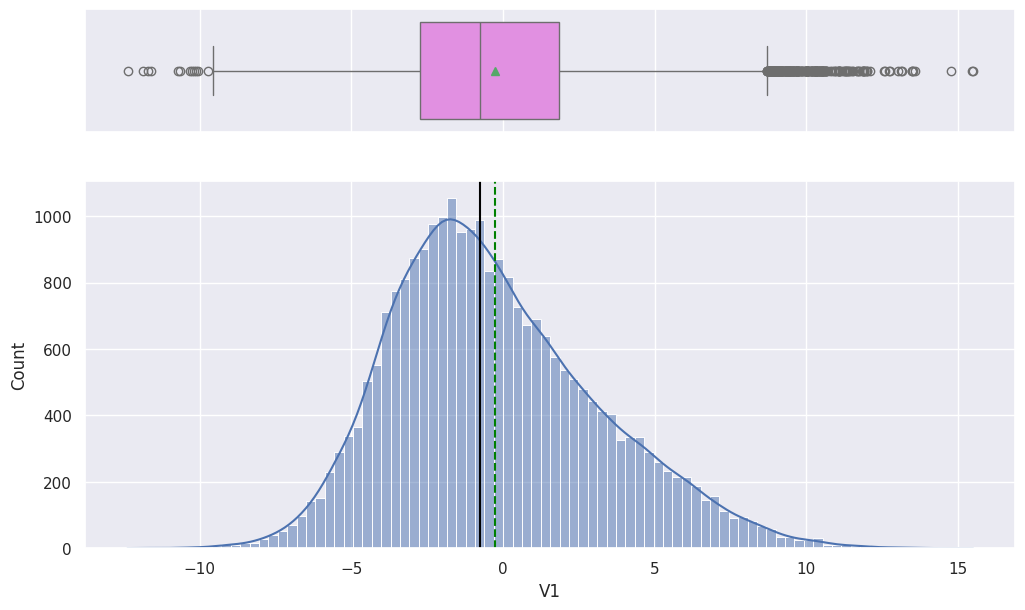

In [ ]:
histogram_boxplot(df, "V1", kde=True)

**Observations**
*   This is a **slightly right-skewed distribution**.
*   Most values are clustered on the lower side.
*   The tail extends to the right with some high-value outliers.

#### `V2`

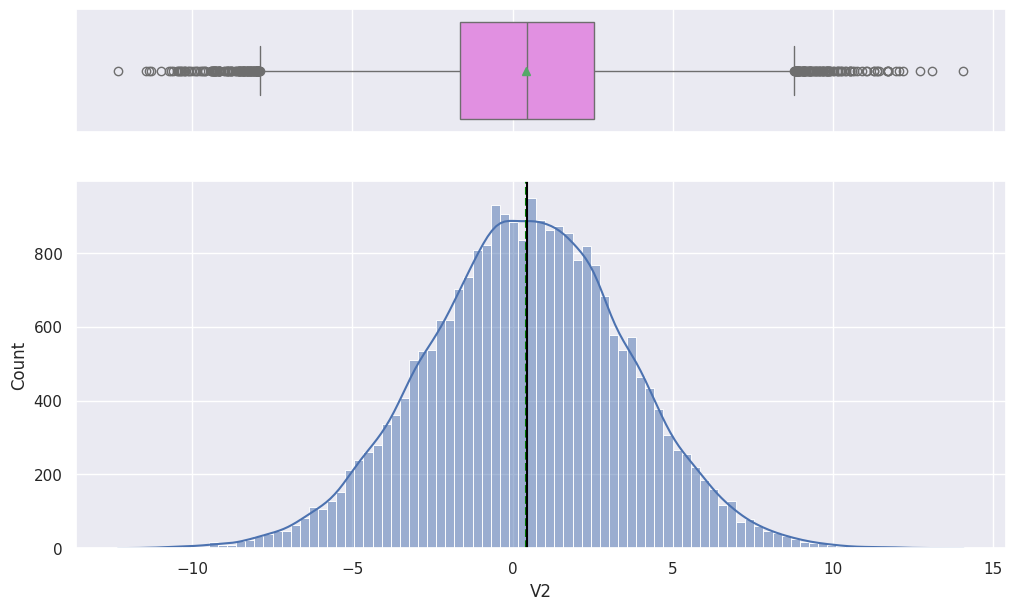

In [ ]:
histogram_boxplot(df, "V2", kde=True)

**Observations**

The variable V2 is almost normally distributed but with a slight right skew.

### `V3`

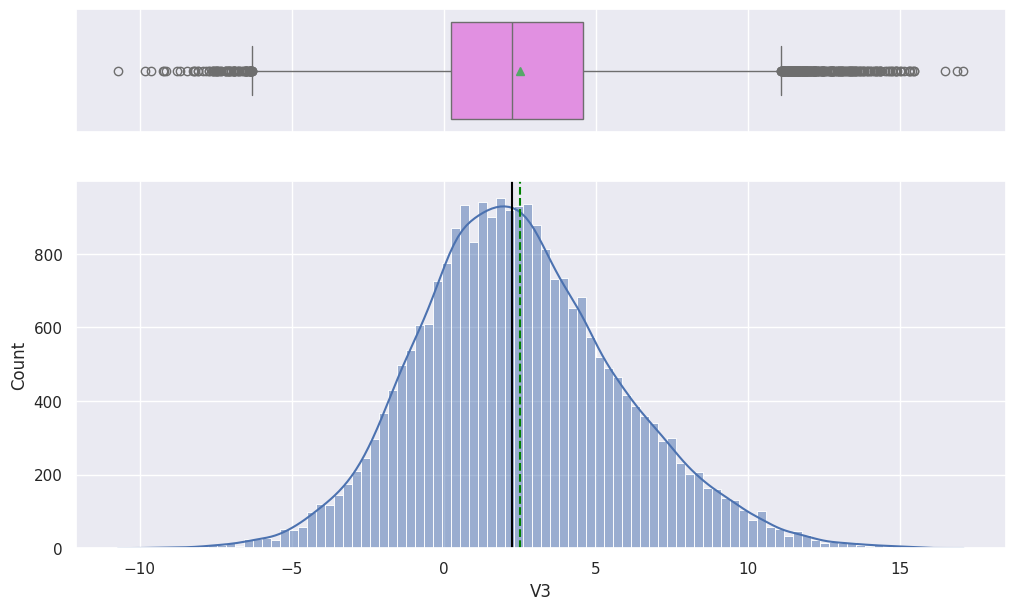

In [ ]:
histogram_boxplot(df, "V3", kde=True)

**Observations**

*   This is anothere a **slightly right-skewed distribution**.
*   Most values are clustered on the lower side.
*   The tail extends to the right with some high-value outliers.

### Remaining Columns Plotting

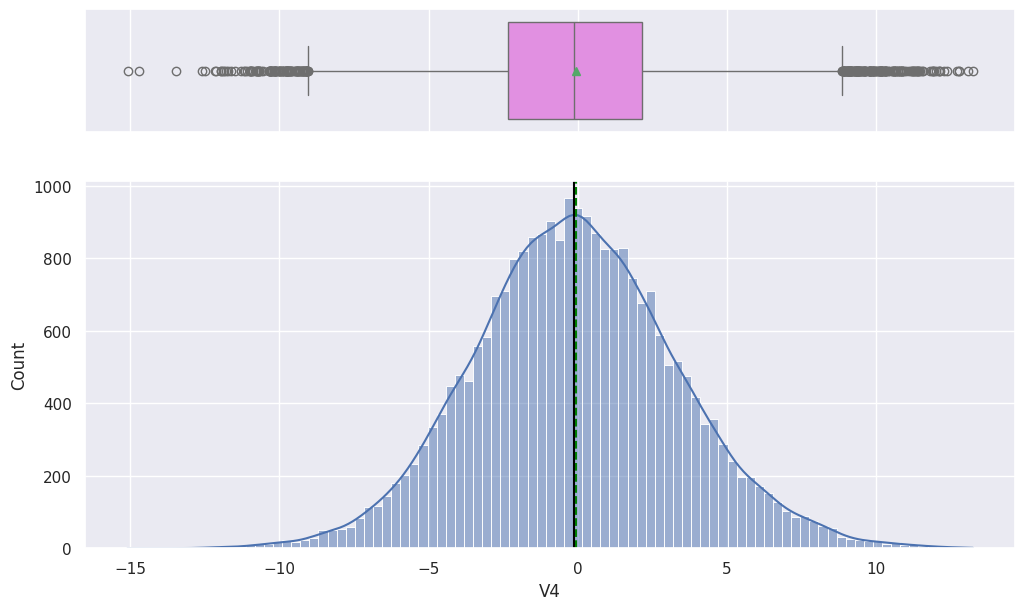

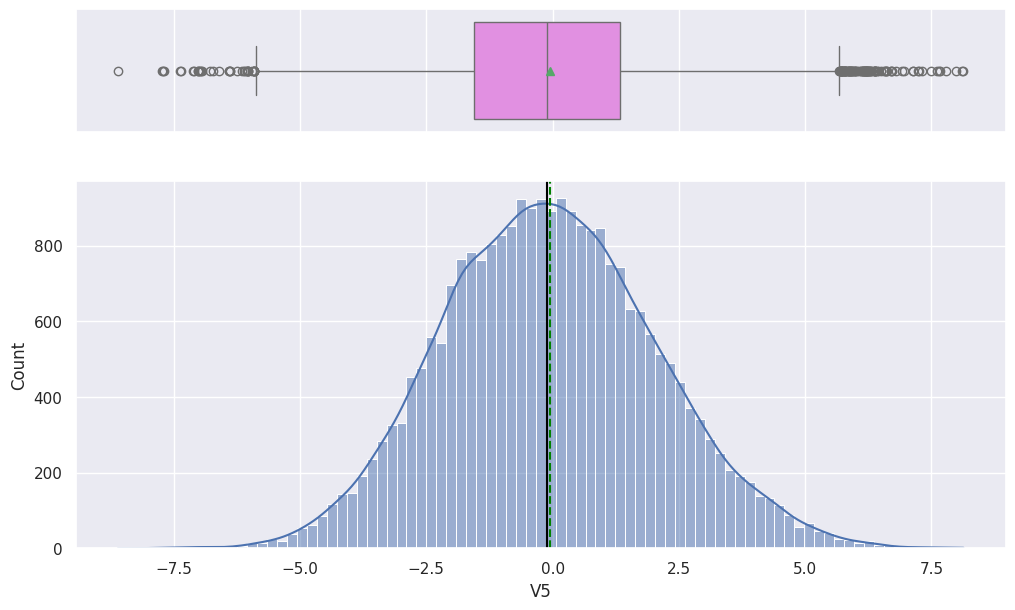

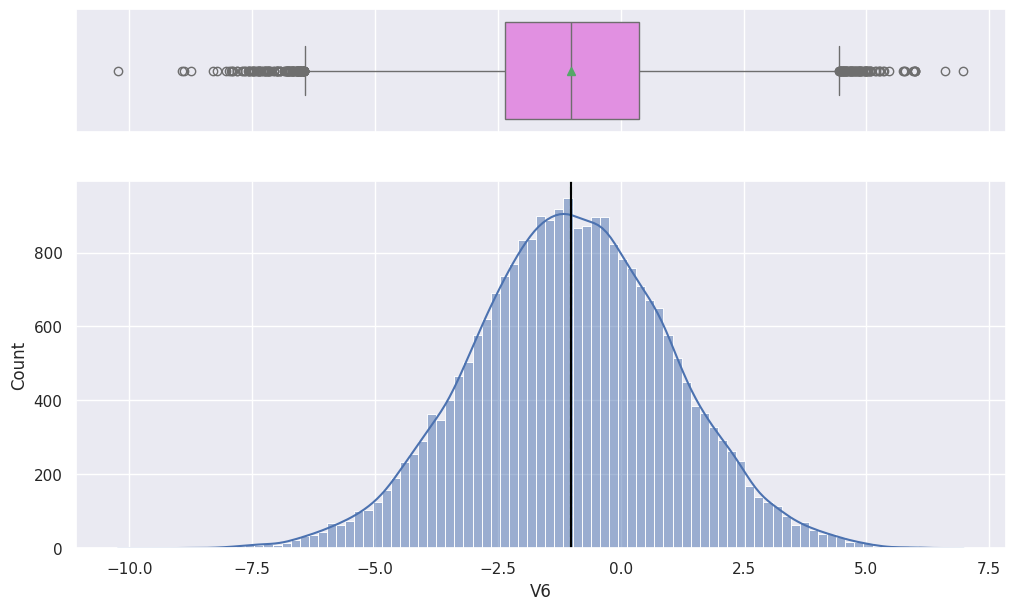

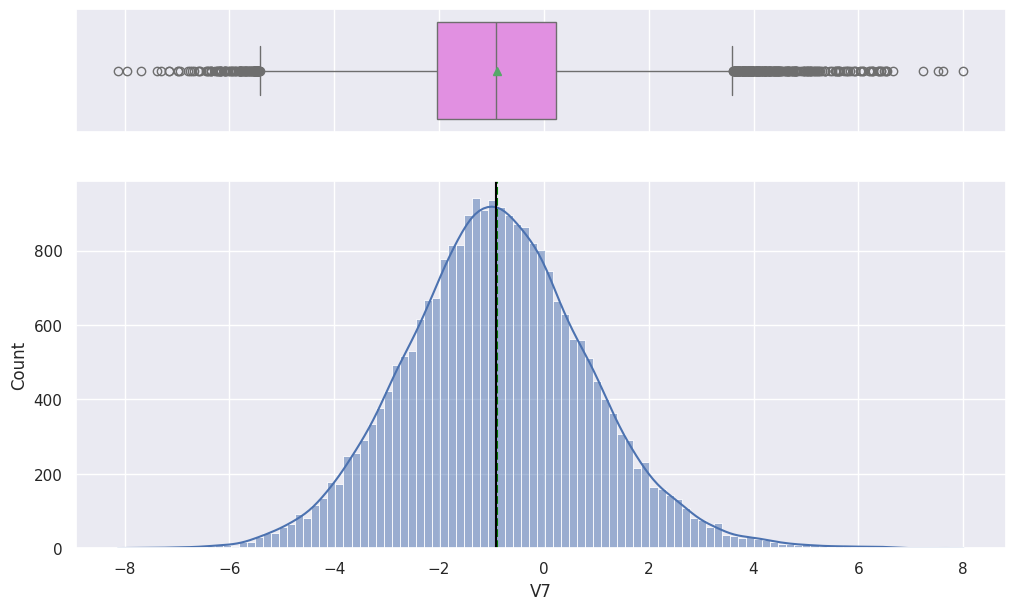

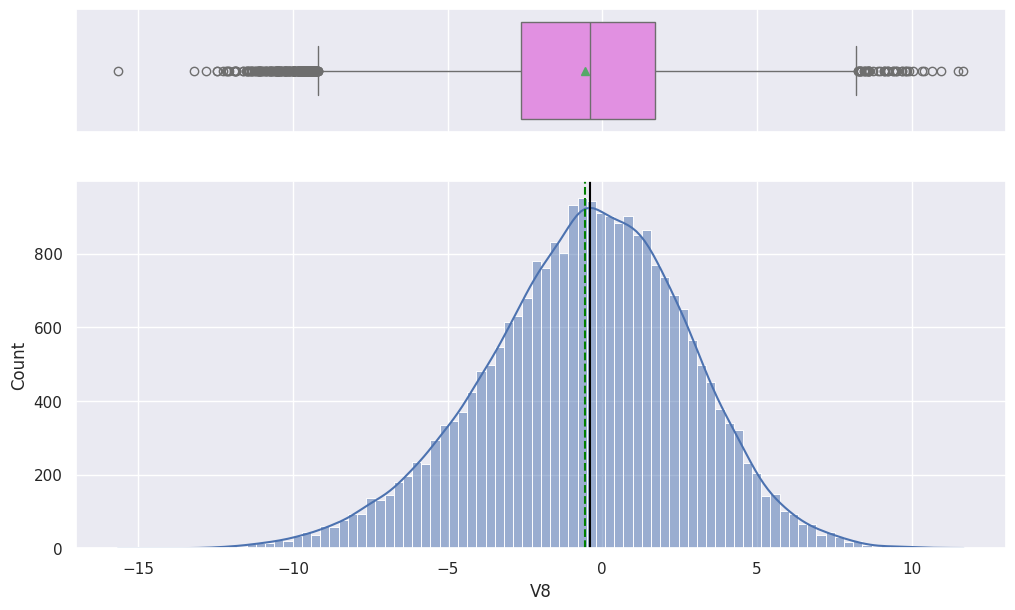

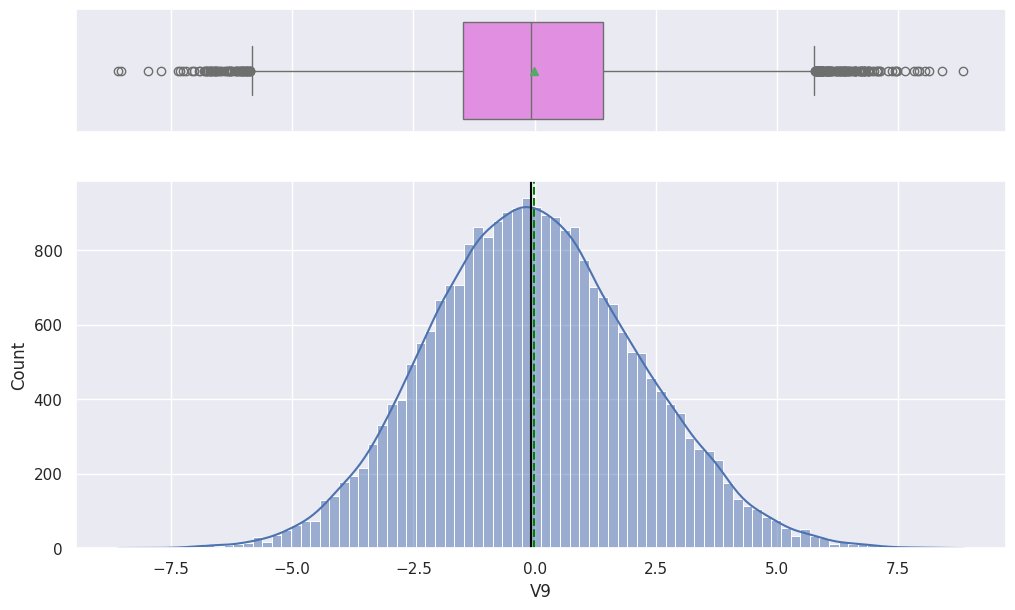

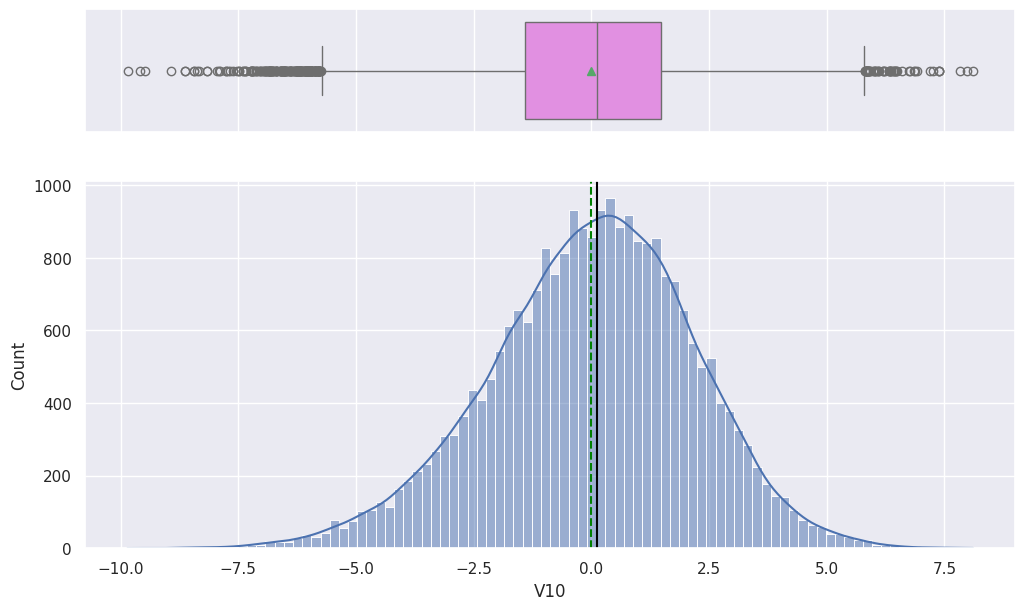

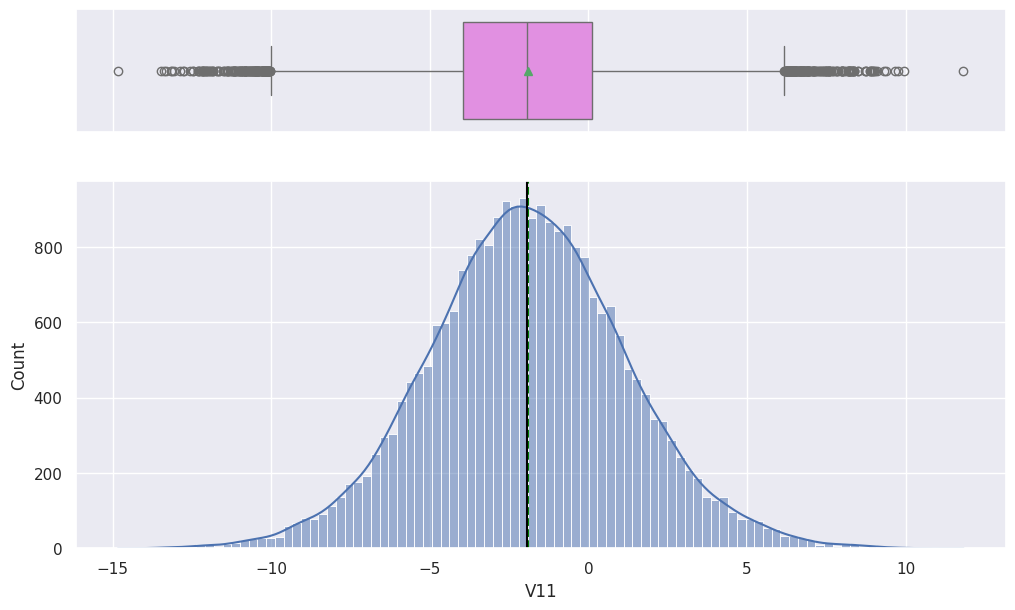

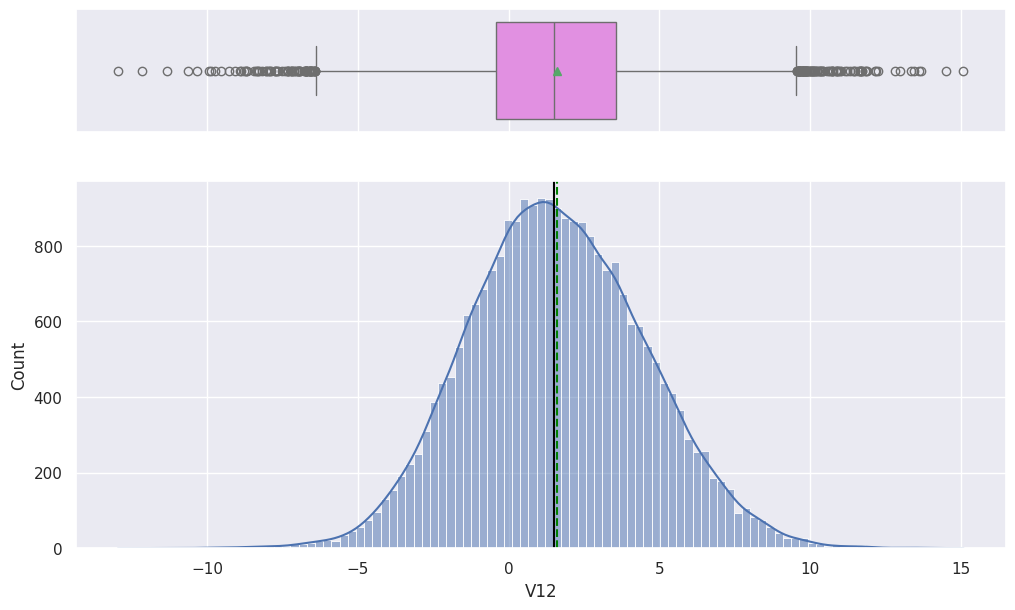

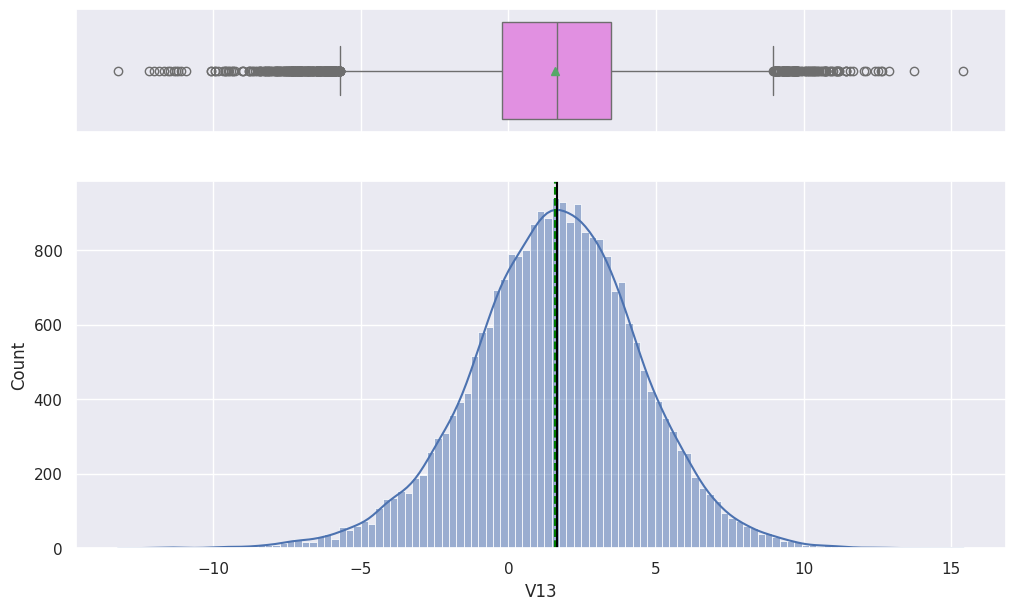

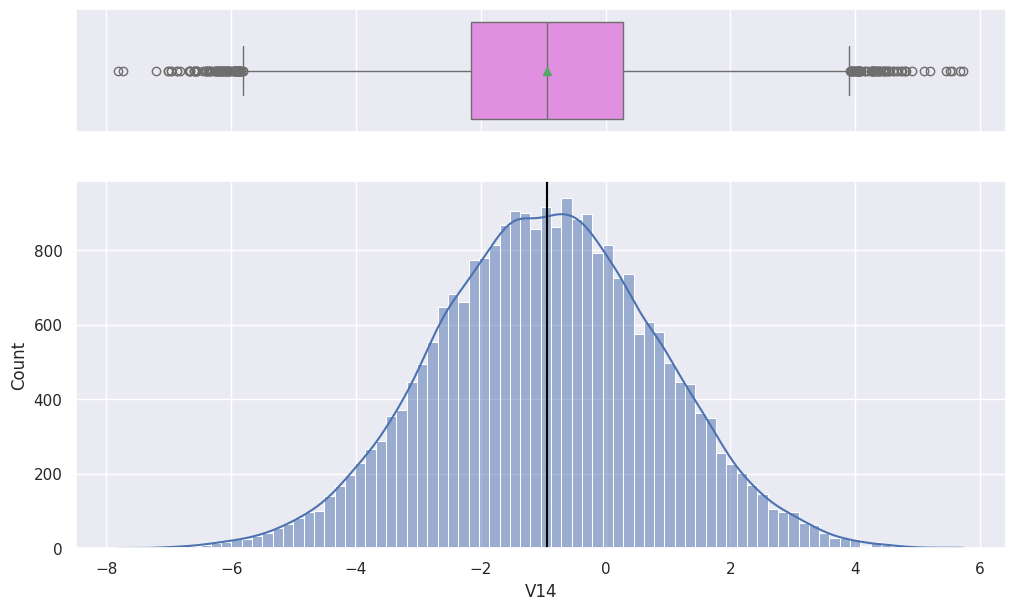

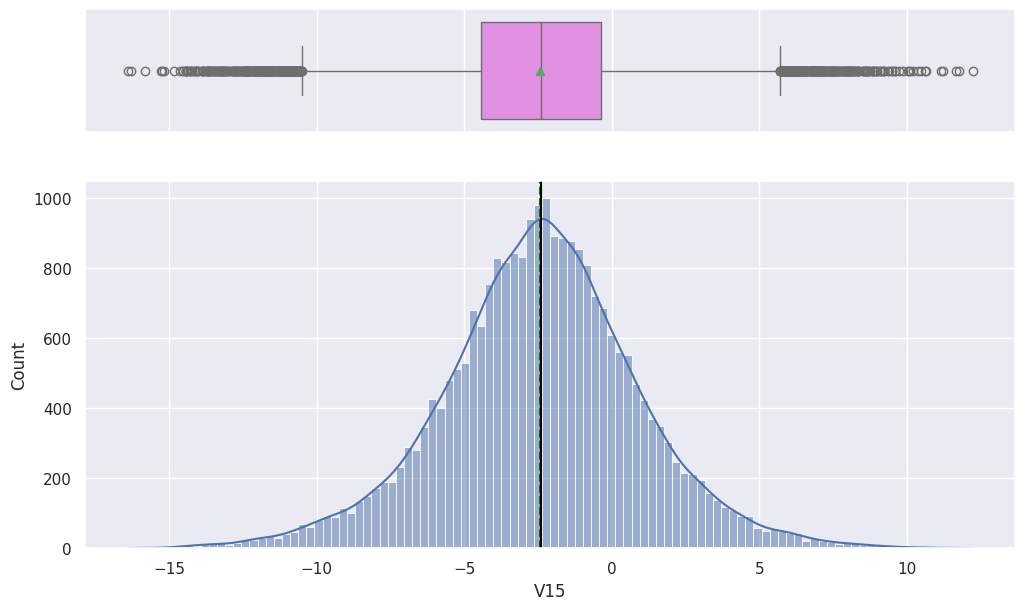

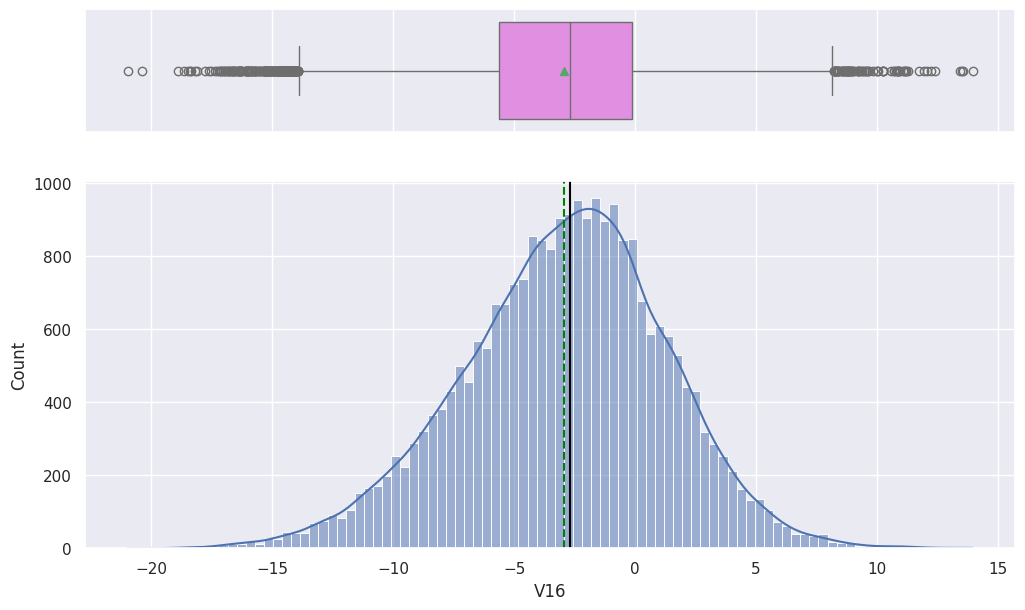

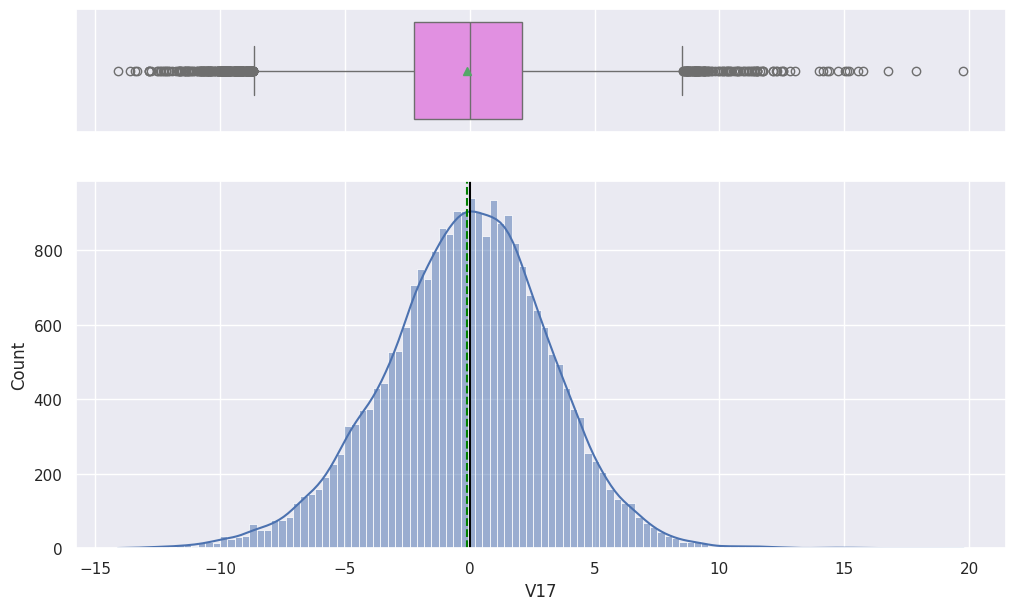

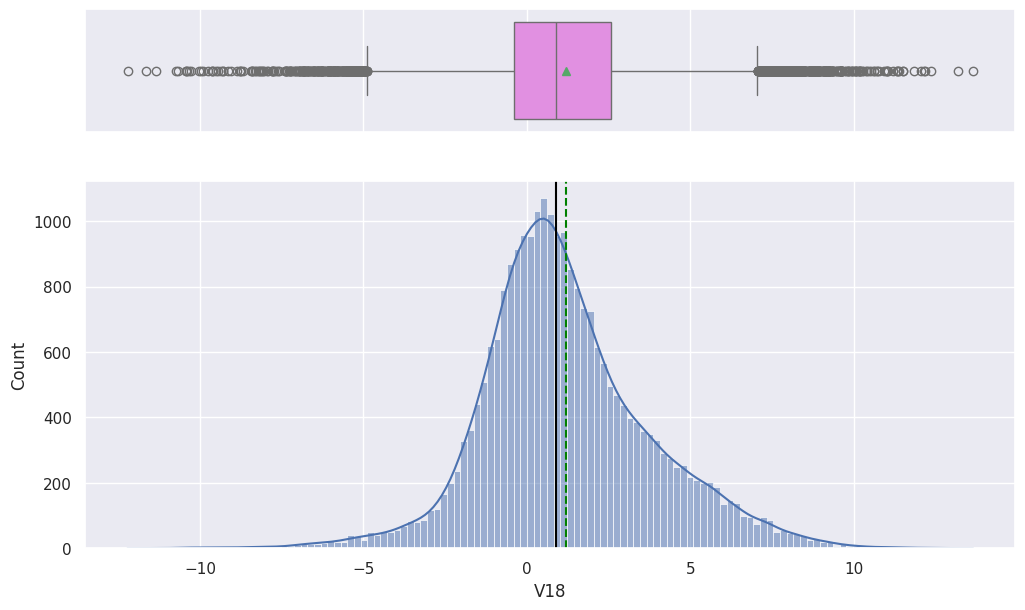

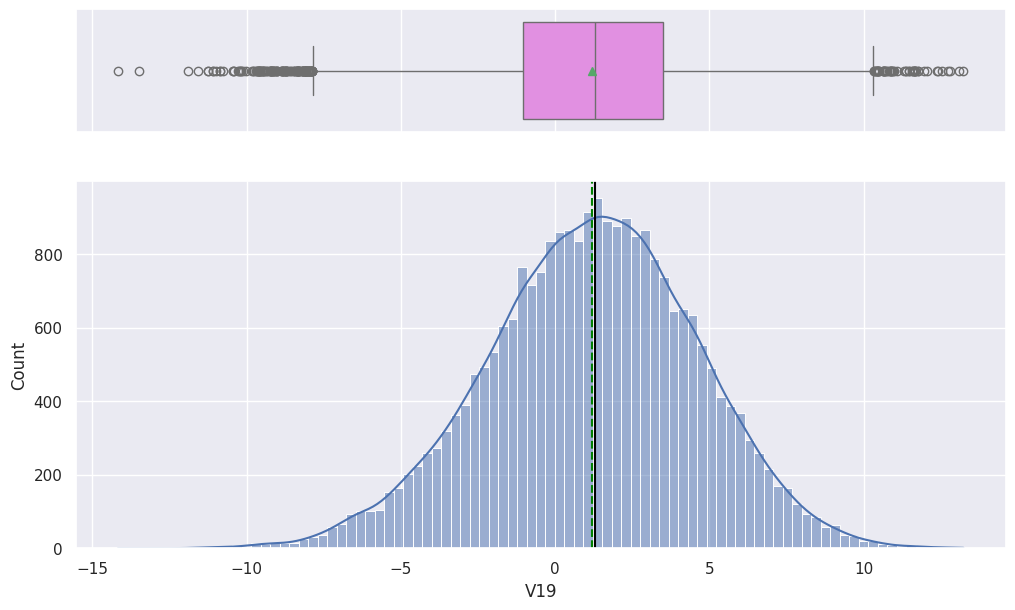

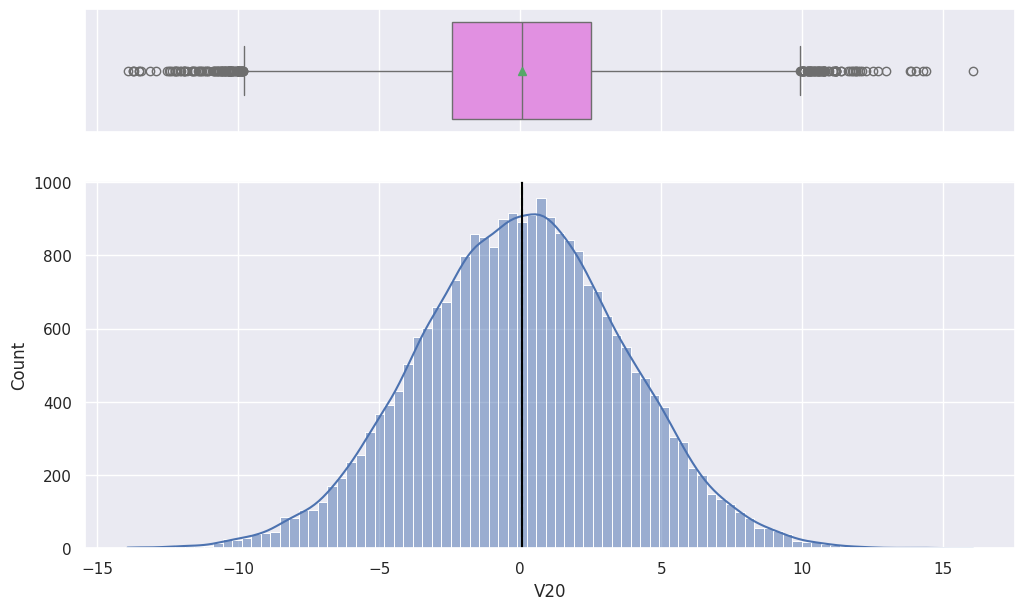

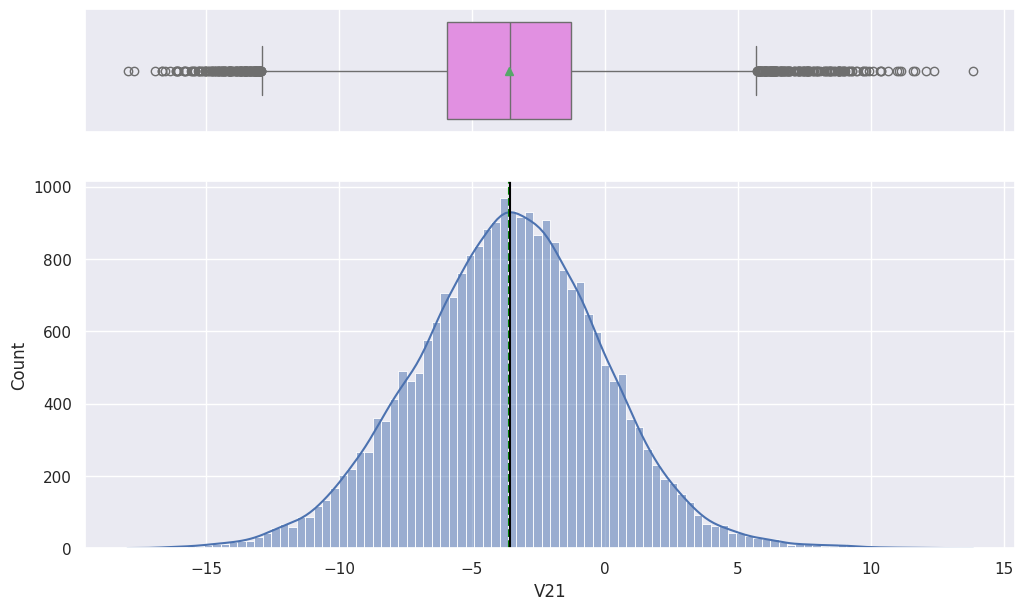

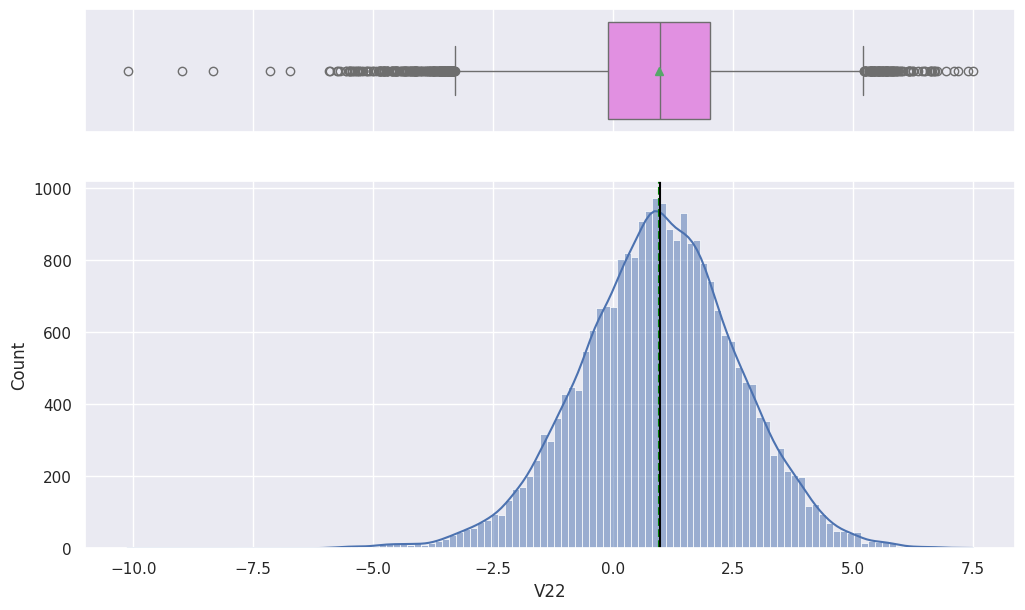

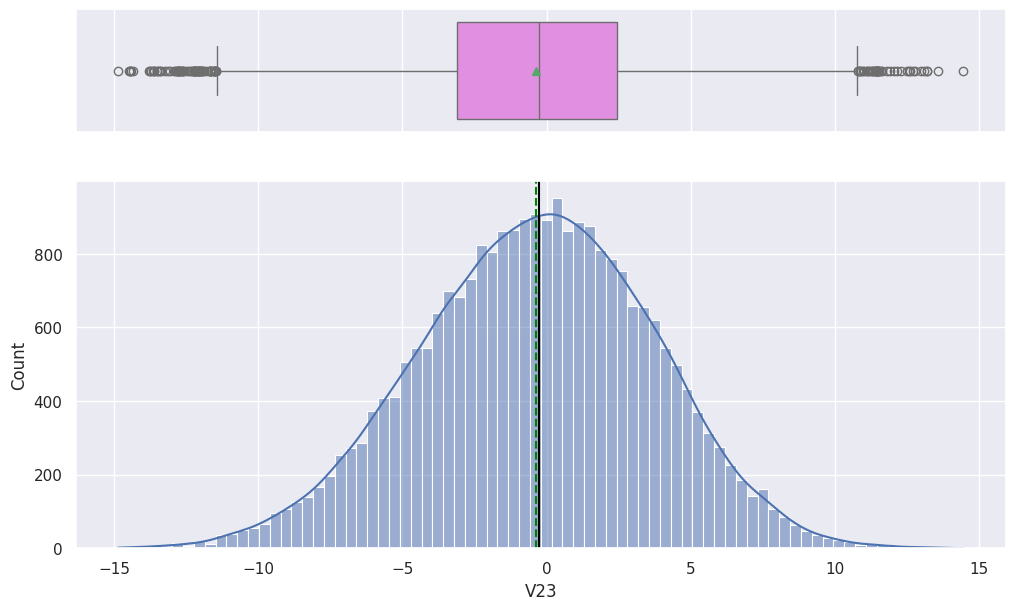

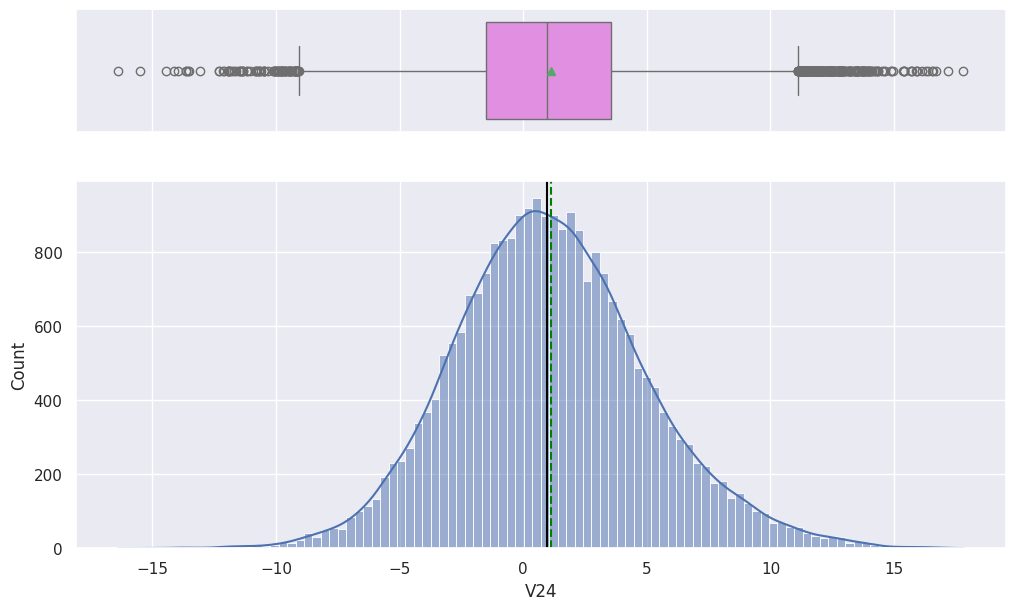

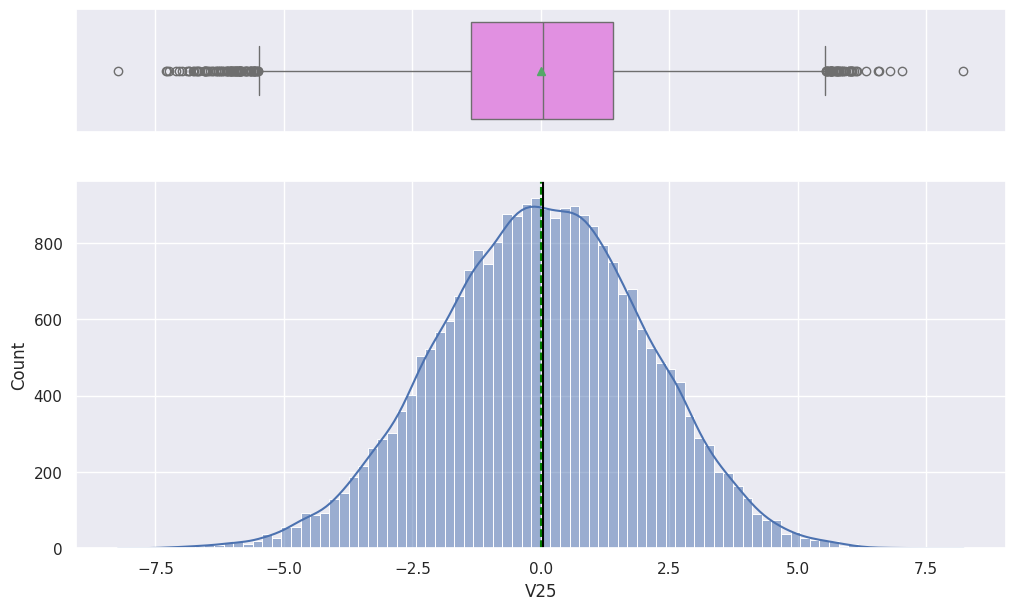

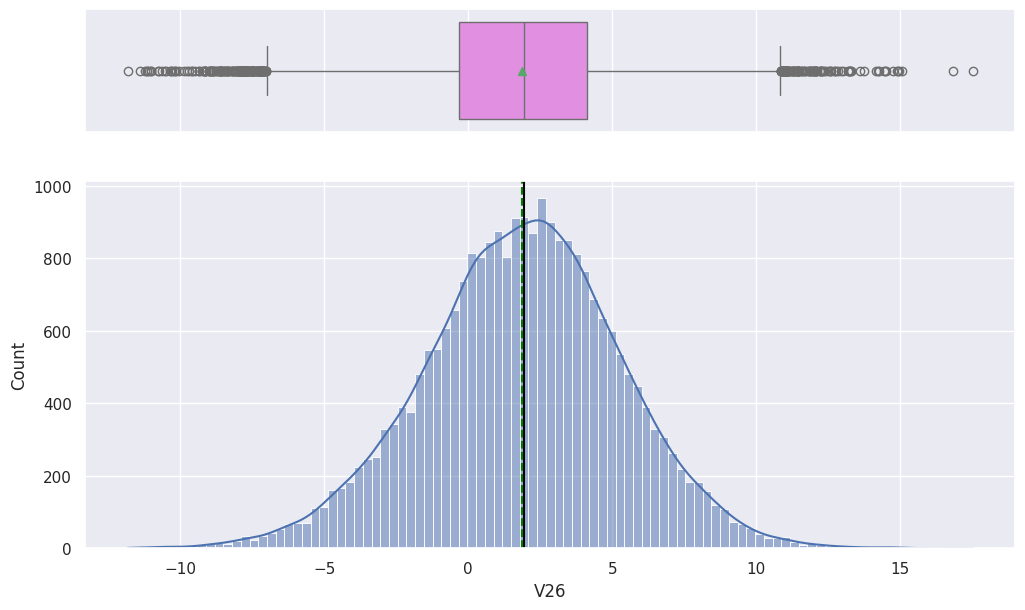

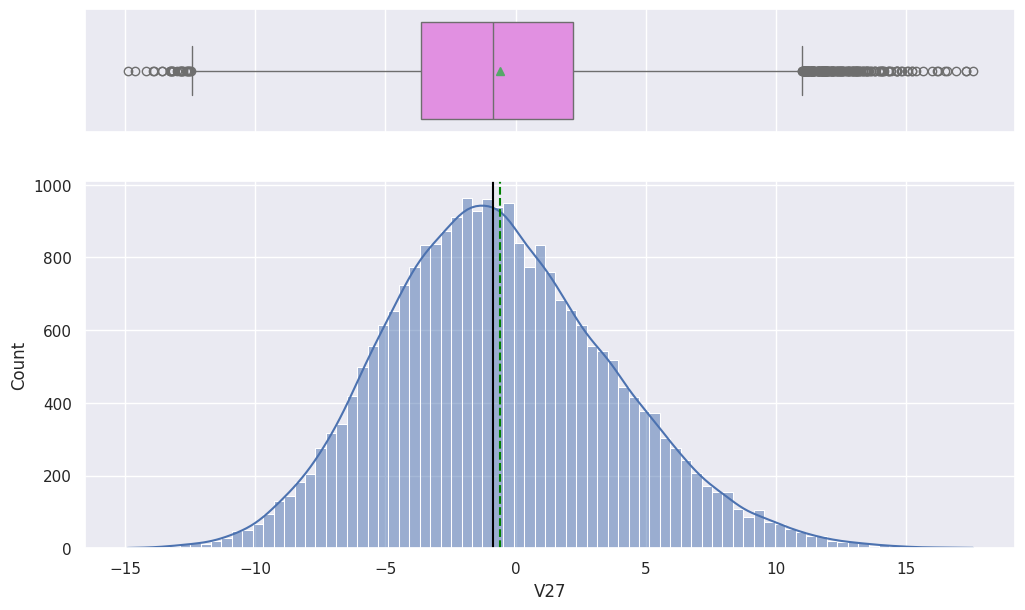

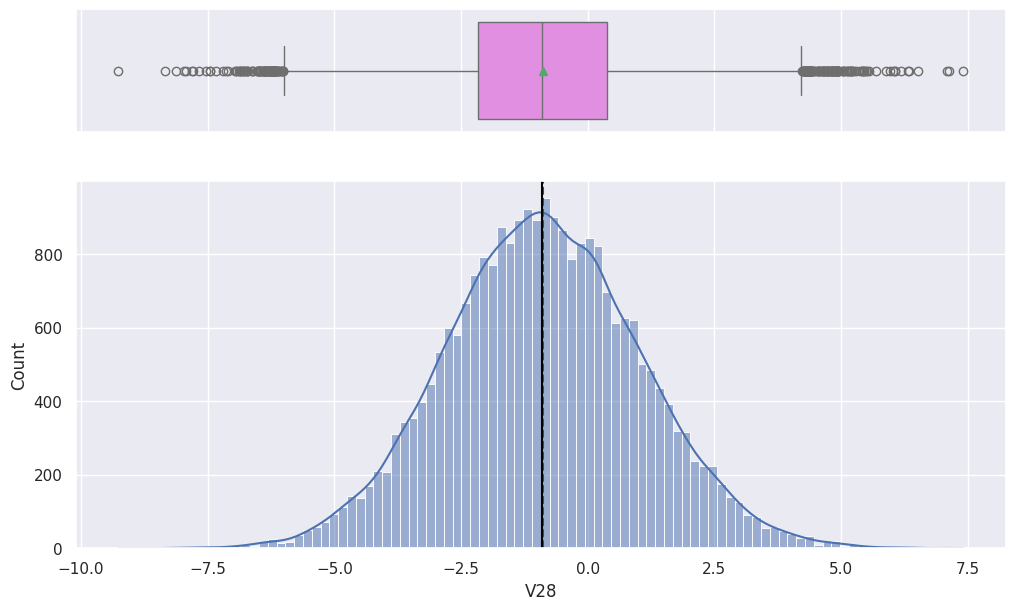

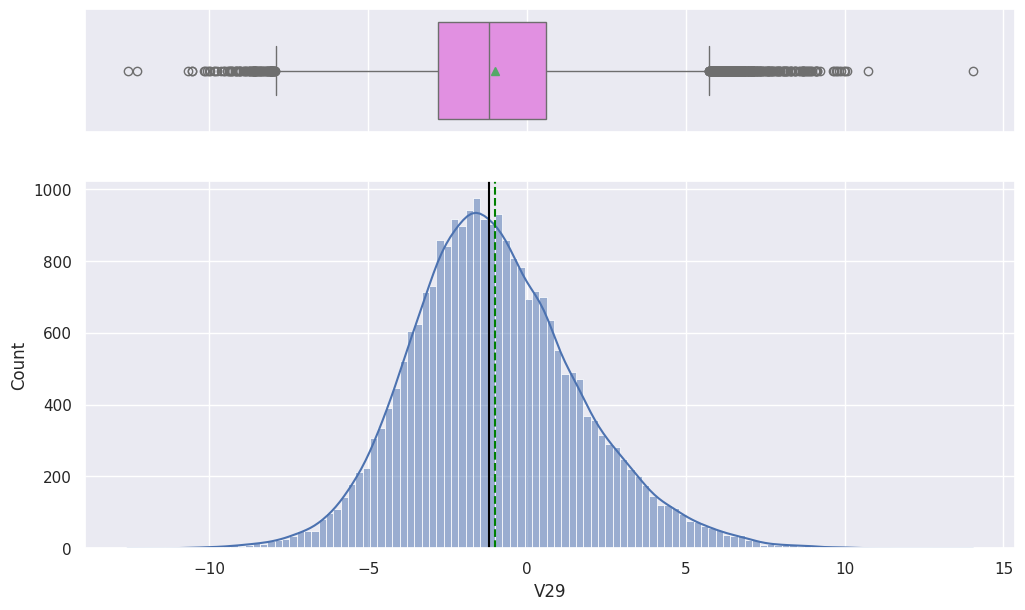

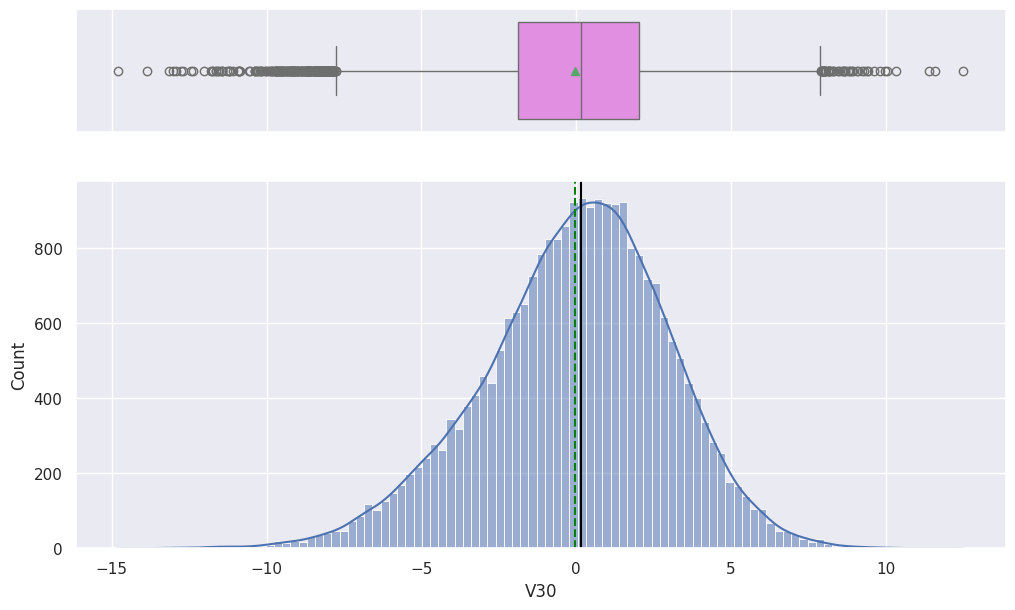

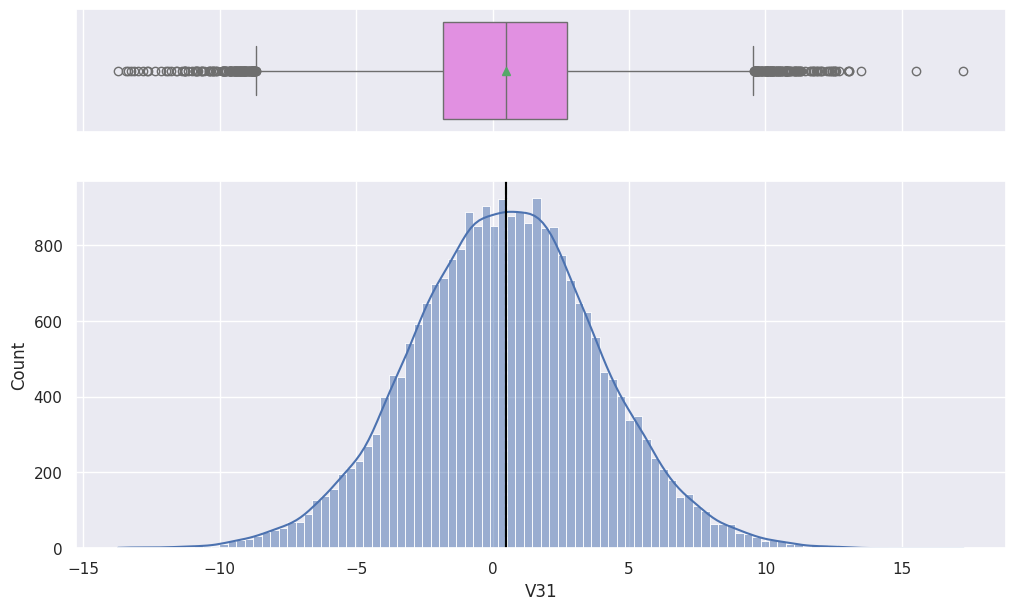

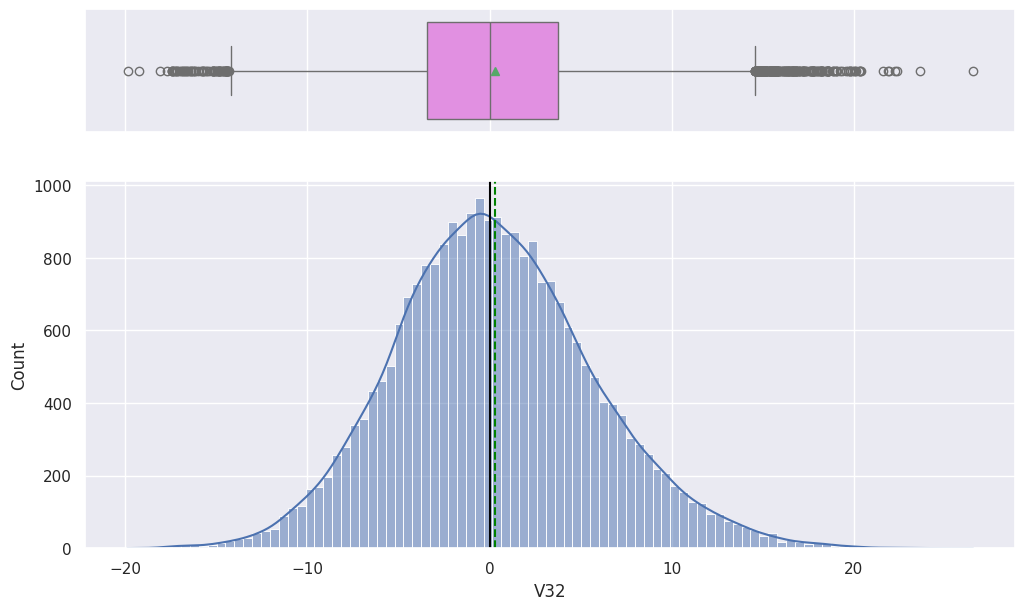

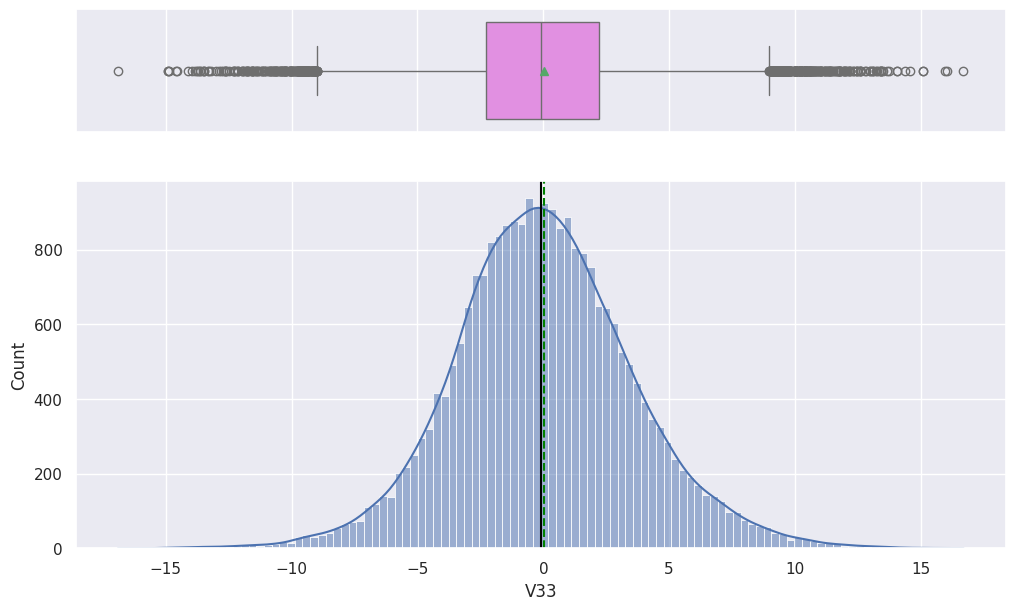

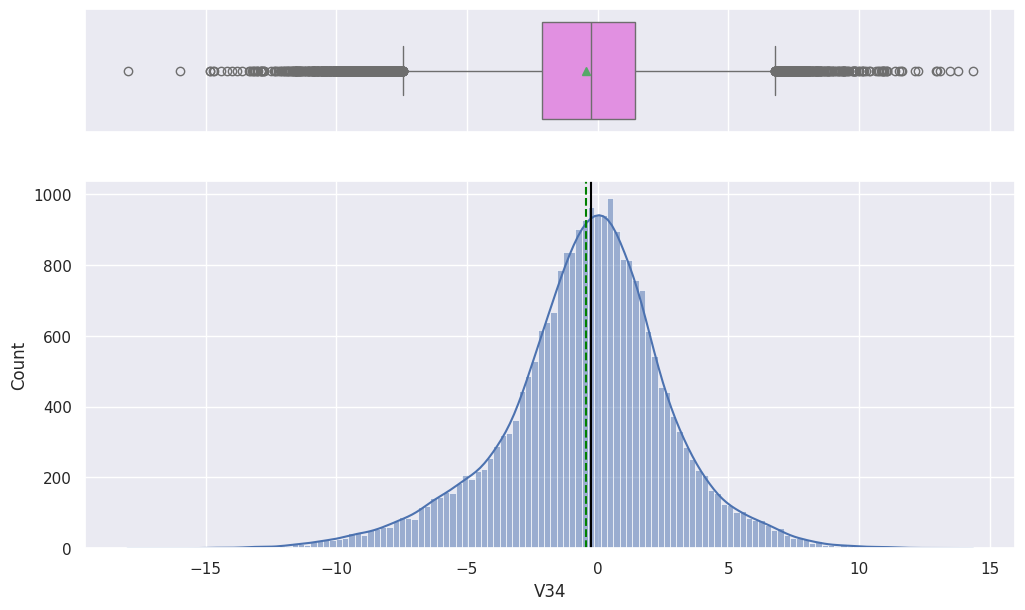

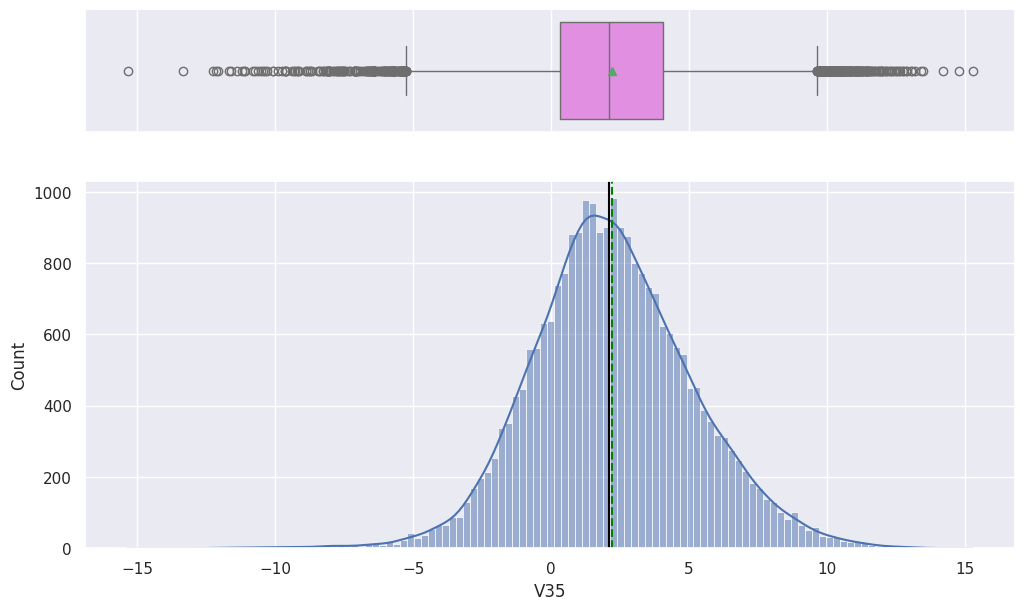

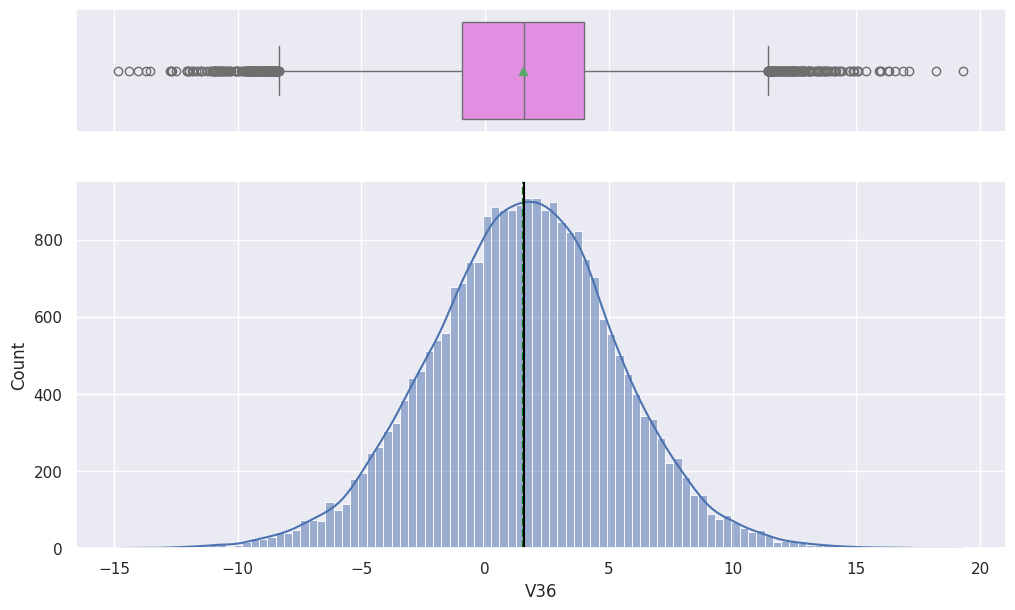

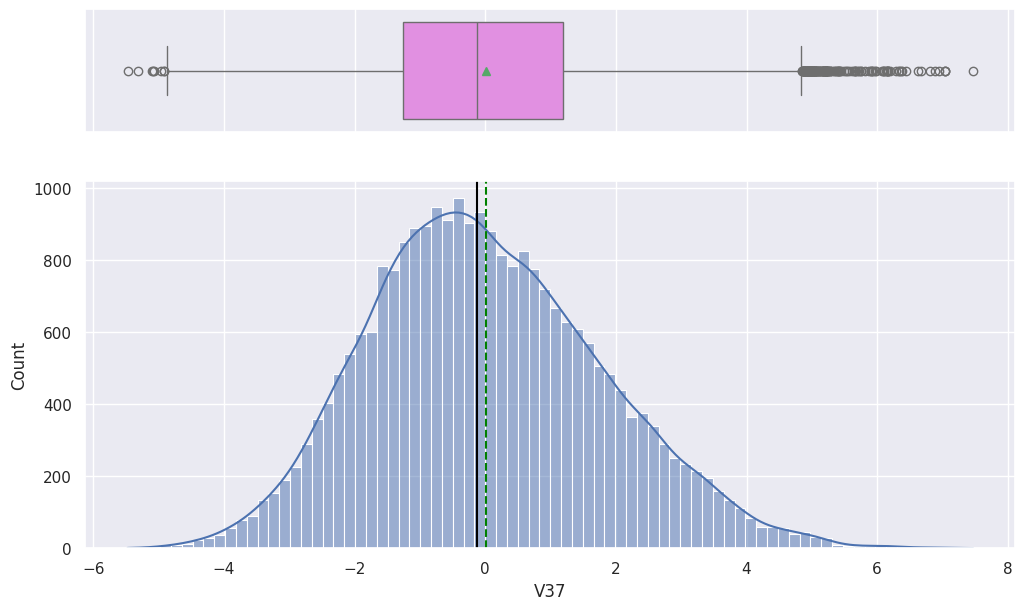

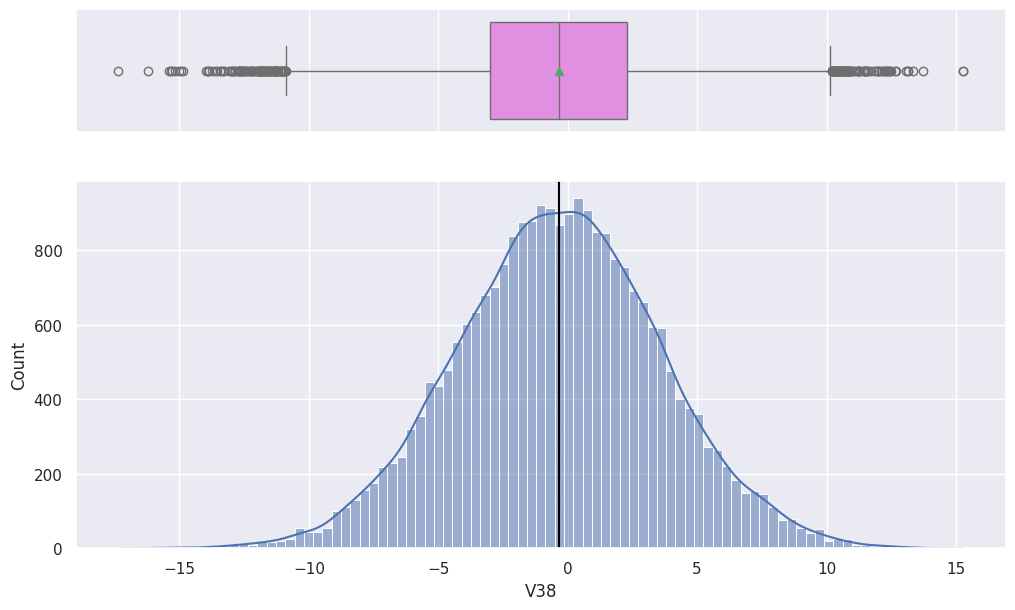

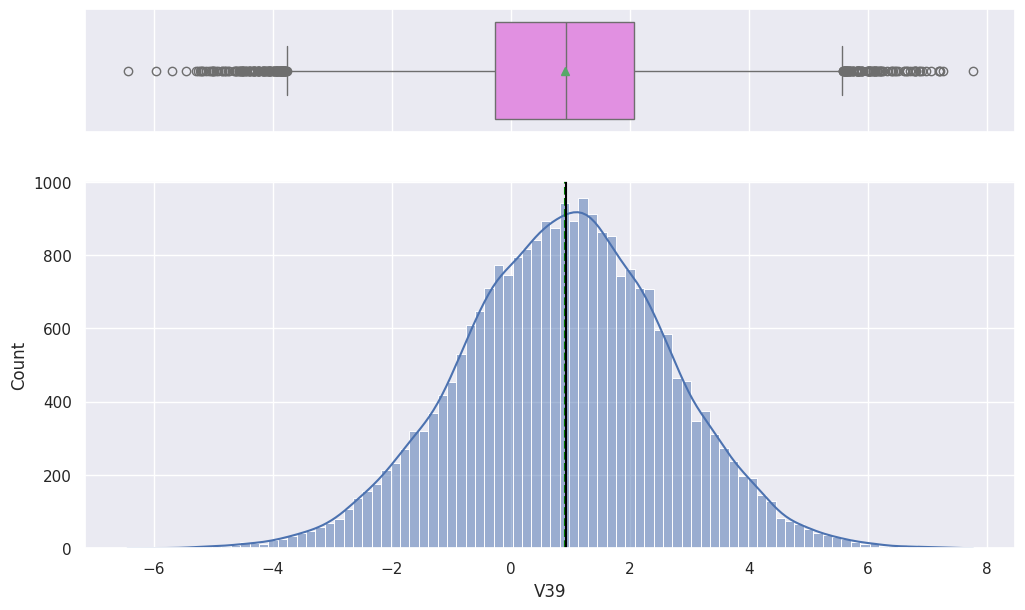

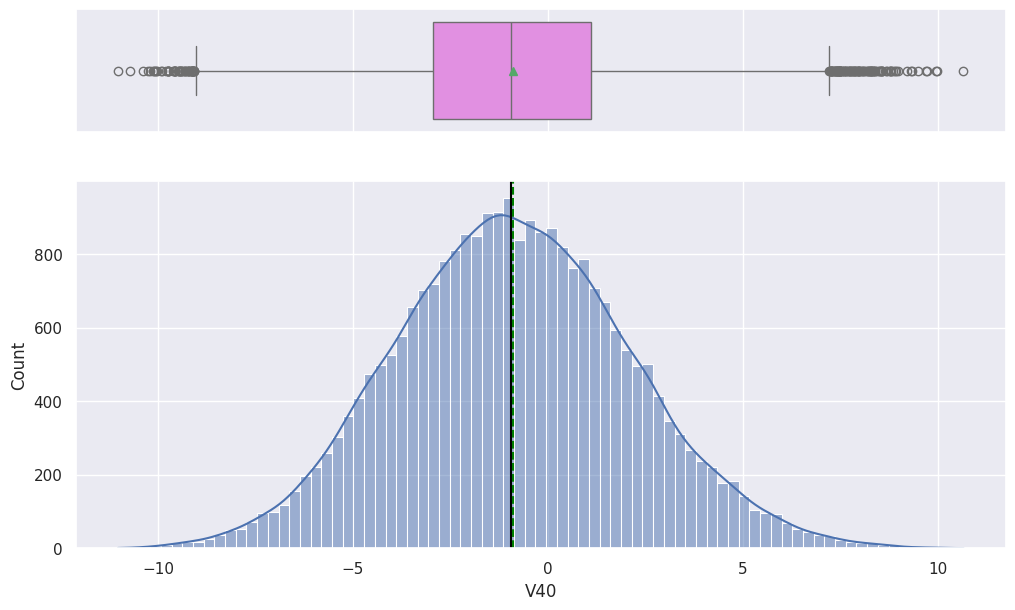

In [ ]:
# Assuming your DataFrame is named 'df'
for col in df.columns[3:-1]:
    histogram_boxplot(df, col, kde=True)

**Observations**

<table border="1" cellpadding="6" cellspacing="0">
  <thead>
    <tr style="background-color:#f2f2f2;">
      <th>Column</th>
      <th>Distribution</th>
      <th>Skewness</th>
      <th>Outliers</th>
    </tr>
  </thead>
  <tbody>
  <tr>
    <tr>
      <td>V6</td>
      <td>Nearly Normal</td>
      <td>No data Skew</td>
      <td>Present on both sides</td>
    </tr>
    <tr>
      <td>V14</td>
      <td>Nearly Normal</td>
      <td>No data Skew</td>
      <td>Present on both sides</td>
    </tr>
    <tr>
      <td>V20</td>
      <td>Nearly Normal</td>
      <td>No data Skew</td>
      <td>Present on both sides</td>
    </tr>
    <tr>
      <td>V31</td>
      <td>Nearly Normal</td>
      <td>No data Skew</td>
      <td>Present on both sides</td>
    </tr>
    <tr>
      <td>V38</td>
      <td>Nearly Normal</td>
      <td>No data Skew</td>
      <td>Present on both sides</td>
    </tr>
    <tr>
      <td>V8</td>
      <td>Nearly Normal</td>
      <td>Slight Left Skew</td>
      <td>Present on both sides</td>
    </tr>
    <tr>
      <td>V10</td>
      <td>Nearly Normal</td>
      <td>Slight Left Skew</td>
      <td>Present on both sides</td>
    </tr>
    <tr>
      <td>V13</td>
      <td>Nearly Normal</td>
      <td>Slight Left Skew</td>
      <td>Present on both sides</td>
    </tr>
    <tr>
      <td>V15</td>
      <td>Nearly Normal</td>
      <td>Slight Left Skew</td>
      <td>Present on both sides</td>
    </tr>
    <tr>
      <td>V16</td>
      <td>Nearly Normal</td>
      <td>Slight Left Skew</td>
      <td>Present on both sides</td>
    </tr>
    <tr>
      <td>V17</td>
      <td>Nearly Normal</td>
      <td>Slight Left Skew</td>
      <td>Present on both sides</td>
    </tr>
    <tr>
      <td>V19</td>
      <td>Nearly Normal</td>
      <td>Slight Left Skew</td>
      <td>Present on both sides</td>
    </tr>
    <tr>
      <td>V21</td>
      <td>Nearly Normal</td>
      <td>Slight Left Skew</td>
      <td>Present on both sides</td>
    </tr>
    <tr>
      <td>V23</td>
      <td>Nearly Normal</td>
      <td>Slight Left Skew</td>
      <td>Present on both sides</td>
    </tr>
    <tr>
      <td>V25</td>
      <td>Nearly Normal</td>
      <td>Slight Left Skew</td>
      <td>Present on both sides</td>
    </tr>
    <tr>
      <td>V26</td>
      <td>Nearly Normal</td>
      <td>Slight Left Skew</td>
      <td>Present on both sides</td>
    </tr>
    <tr>
      <td>V30</td>
      <td>Nearly Normal</td>
      <td>Slight Left Skew</td>
      <td>Present on both sides</td>
    </tr>
    <tr>
      <td>V34</td>
      <td>Nearly Normal</td>
      <td>Slight Left Skew</td>
      <td>Present on both sides</td>
    </tr>
    <tr>
      <td>V361</td>
      <td>Nearly Normal</td>
      <td>Slight Left Skew</td>
      <td>Present on both sides</td>
    </tr>
    <tr>
      <td>V39</td>
      <td>Nearly Normal</td>
      <td>Slight Left Skew</td>
      <td>Present on both sides</td>
    </tr>
  </tbody>
</table>

**Except the list**
* All other Columns are **slightly right-skewed distribution.**
* Most values are clustered on the lower side.
* The tail extends to the right with some high-value outliers.


## Bivariate Analysis

### Correlation Check

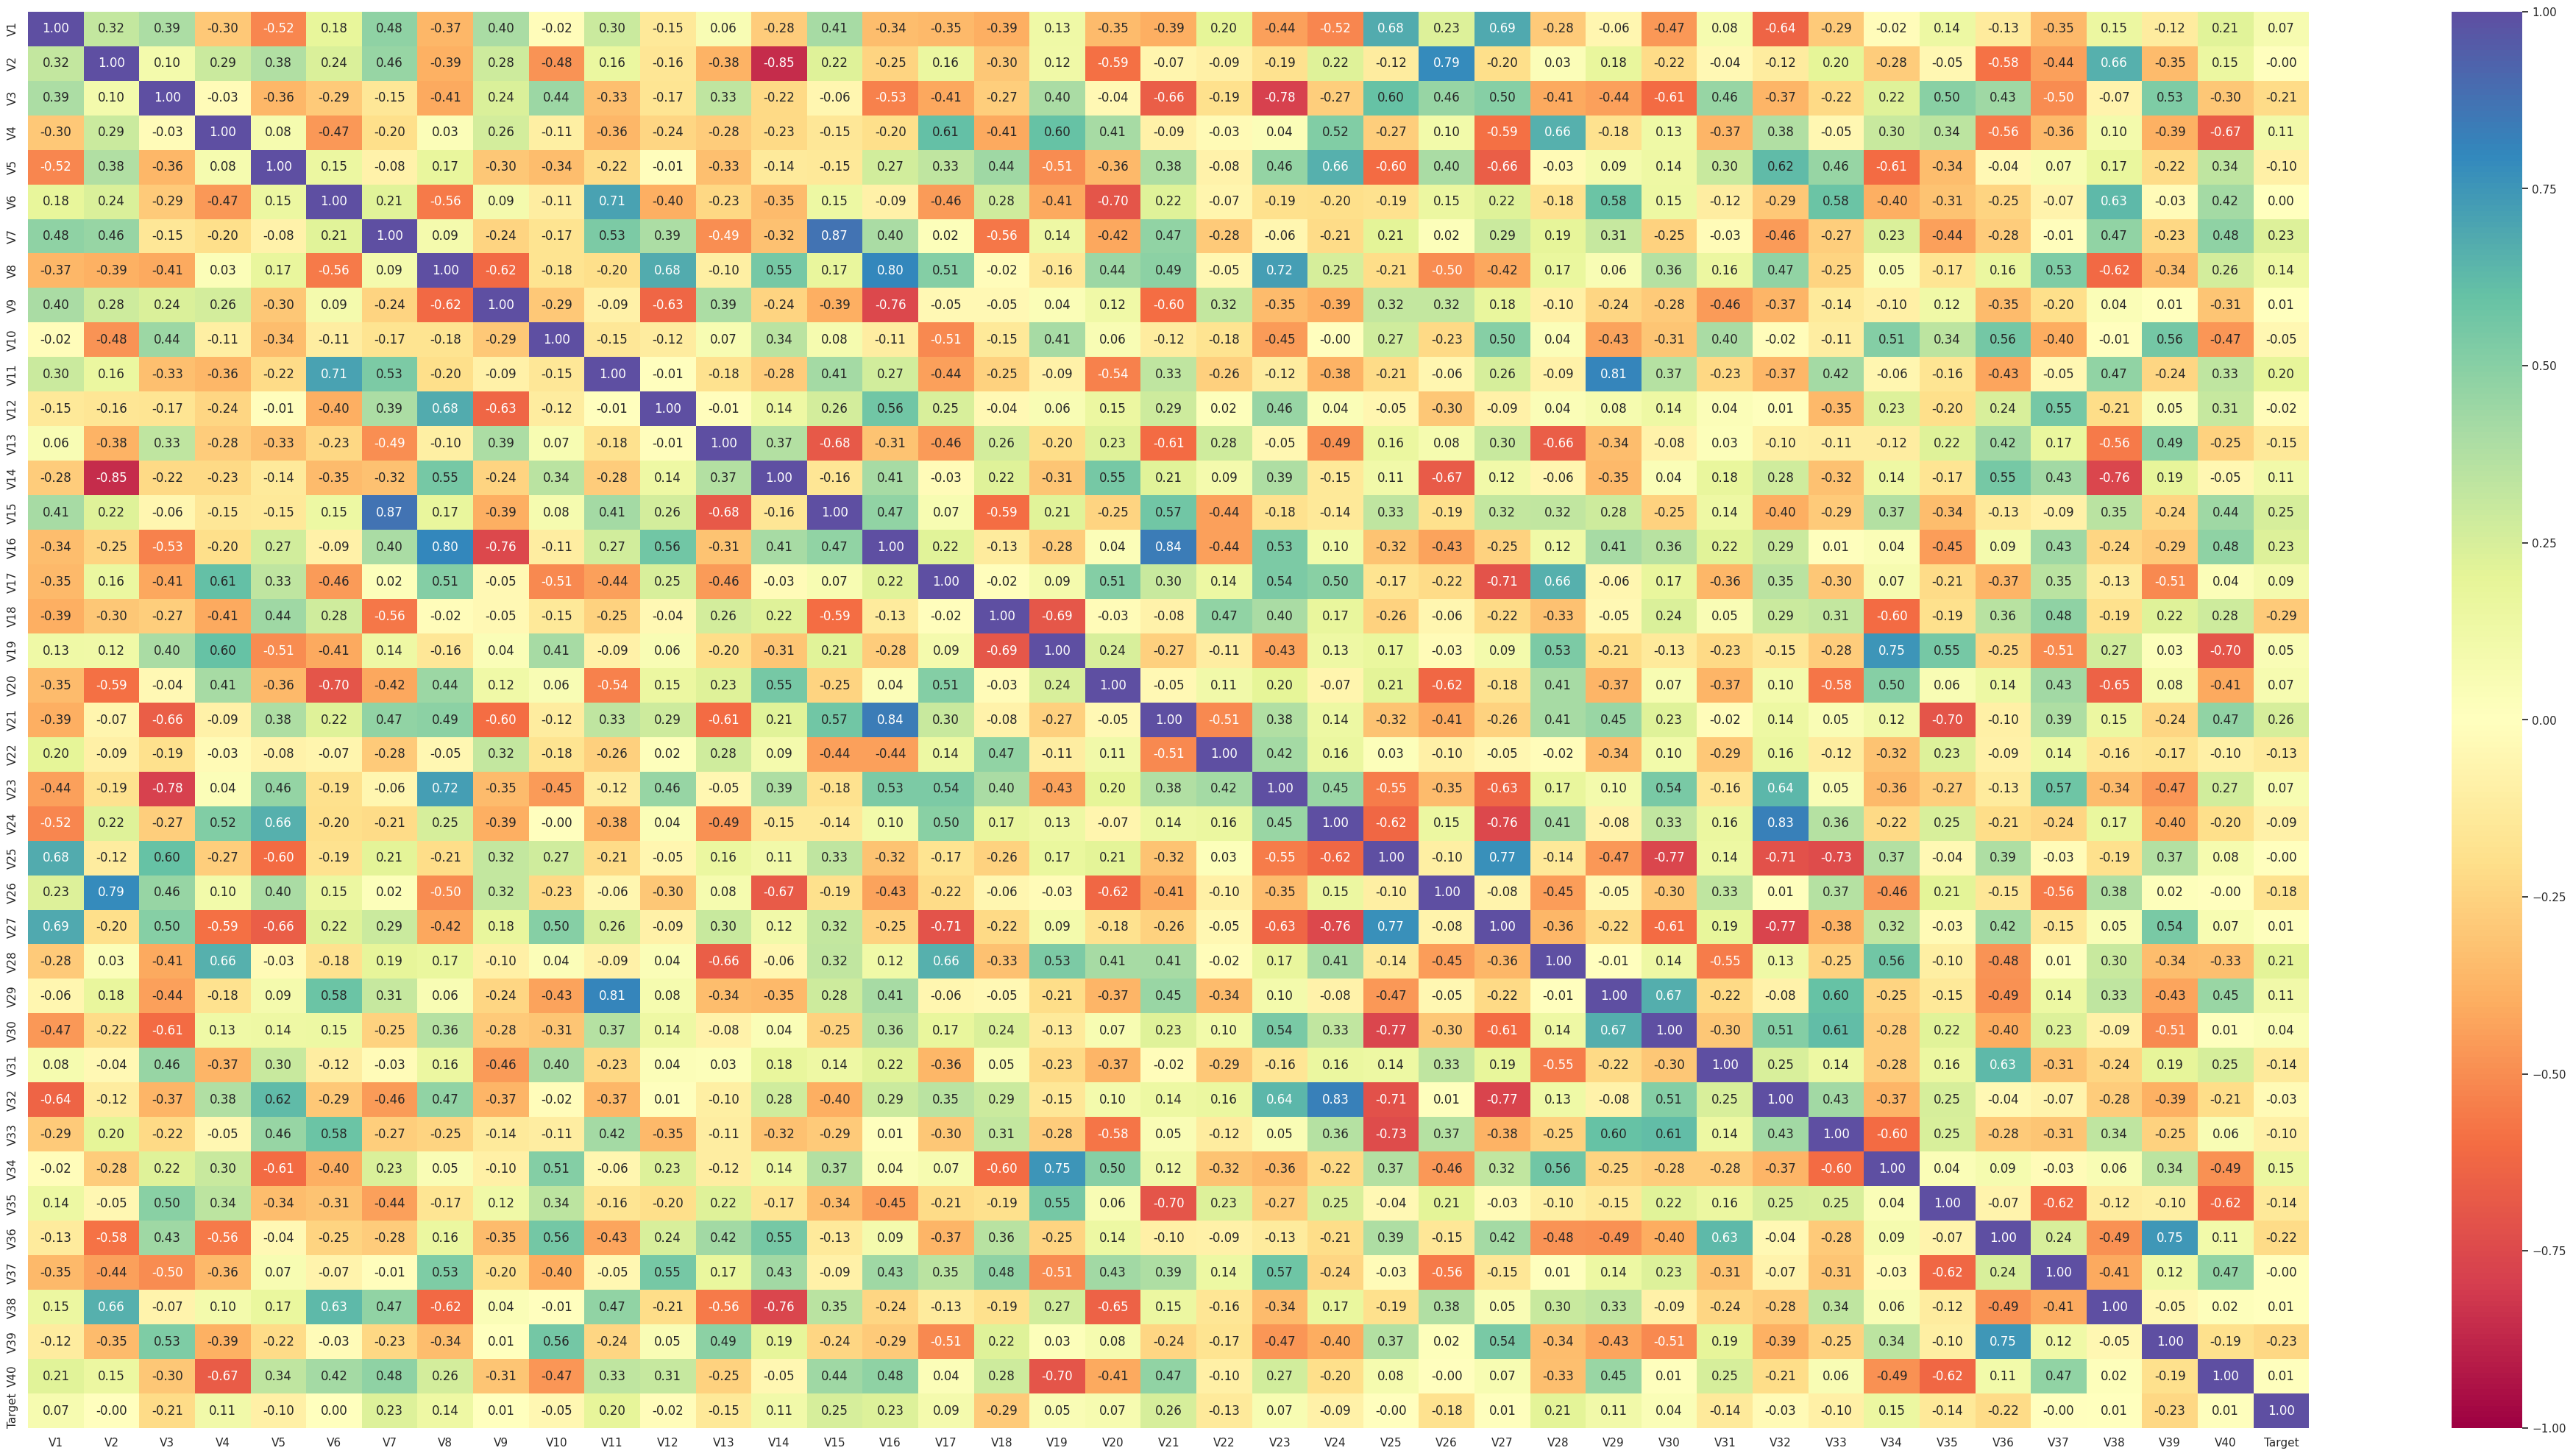

In [ ]:
plt.figure(figsize=(50, 25))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

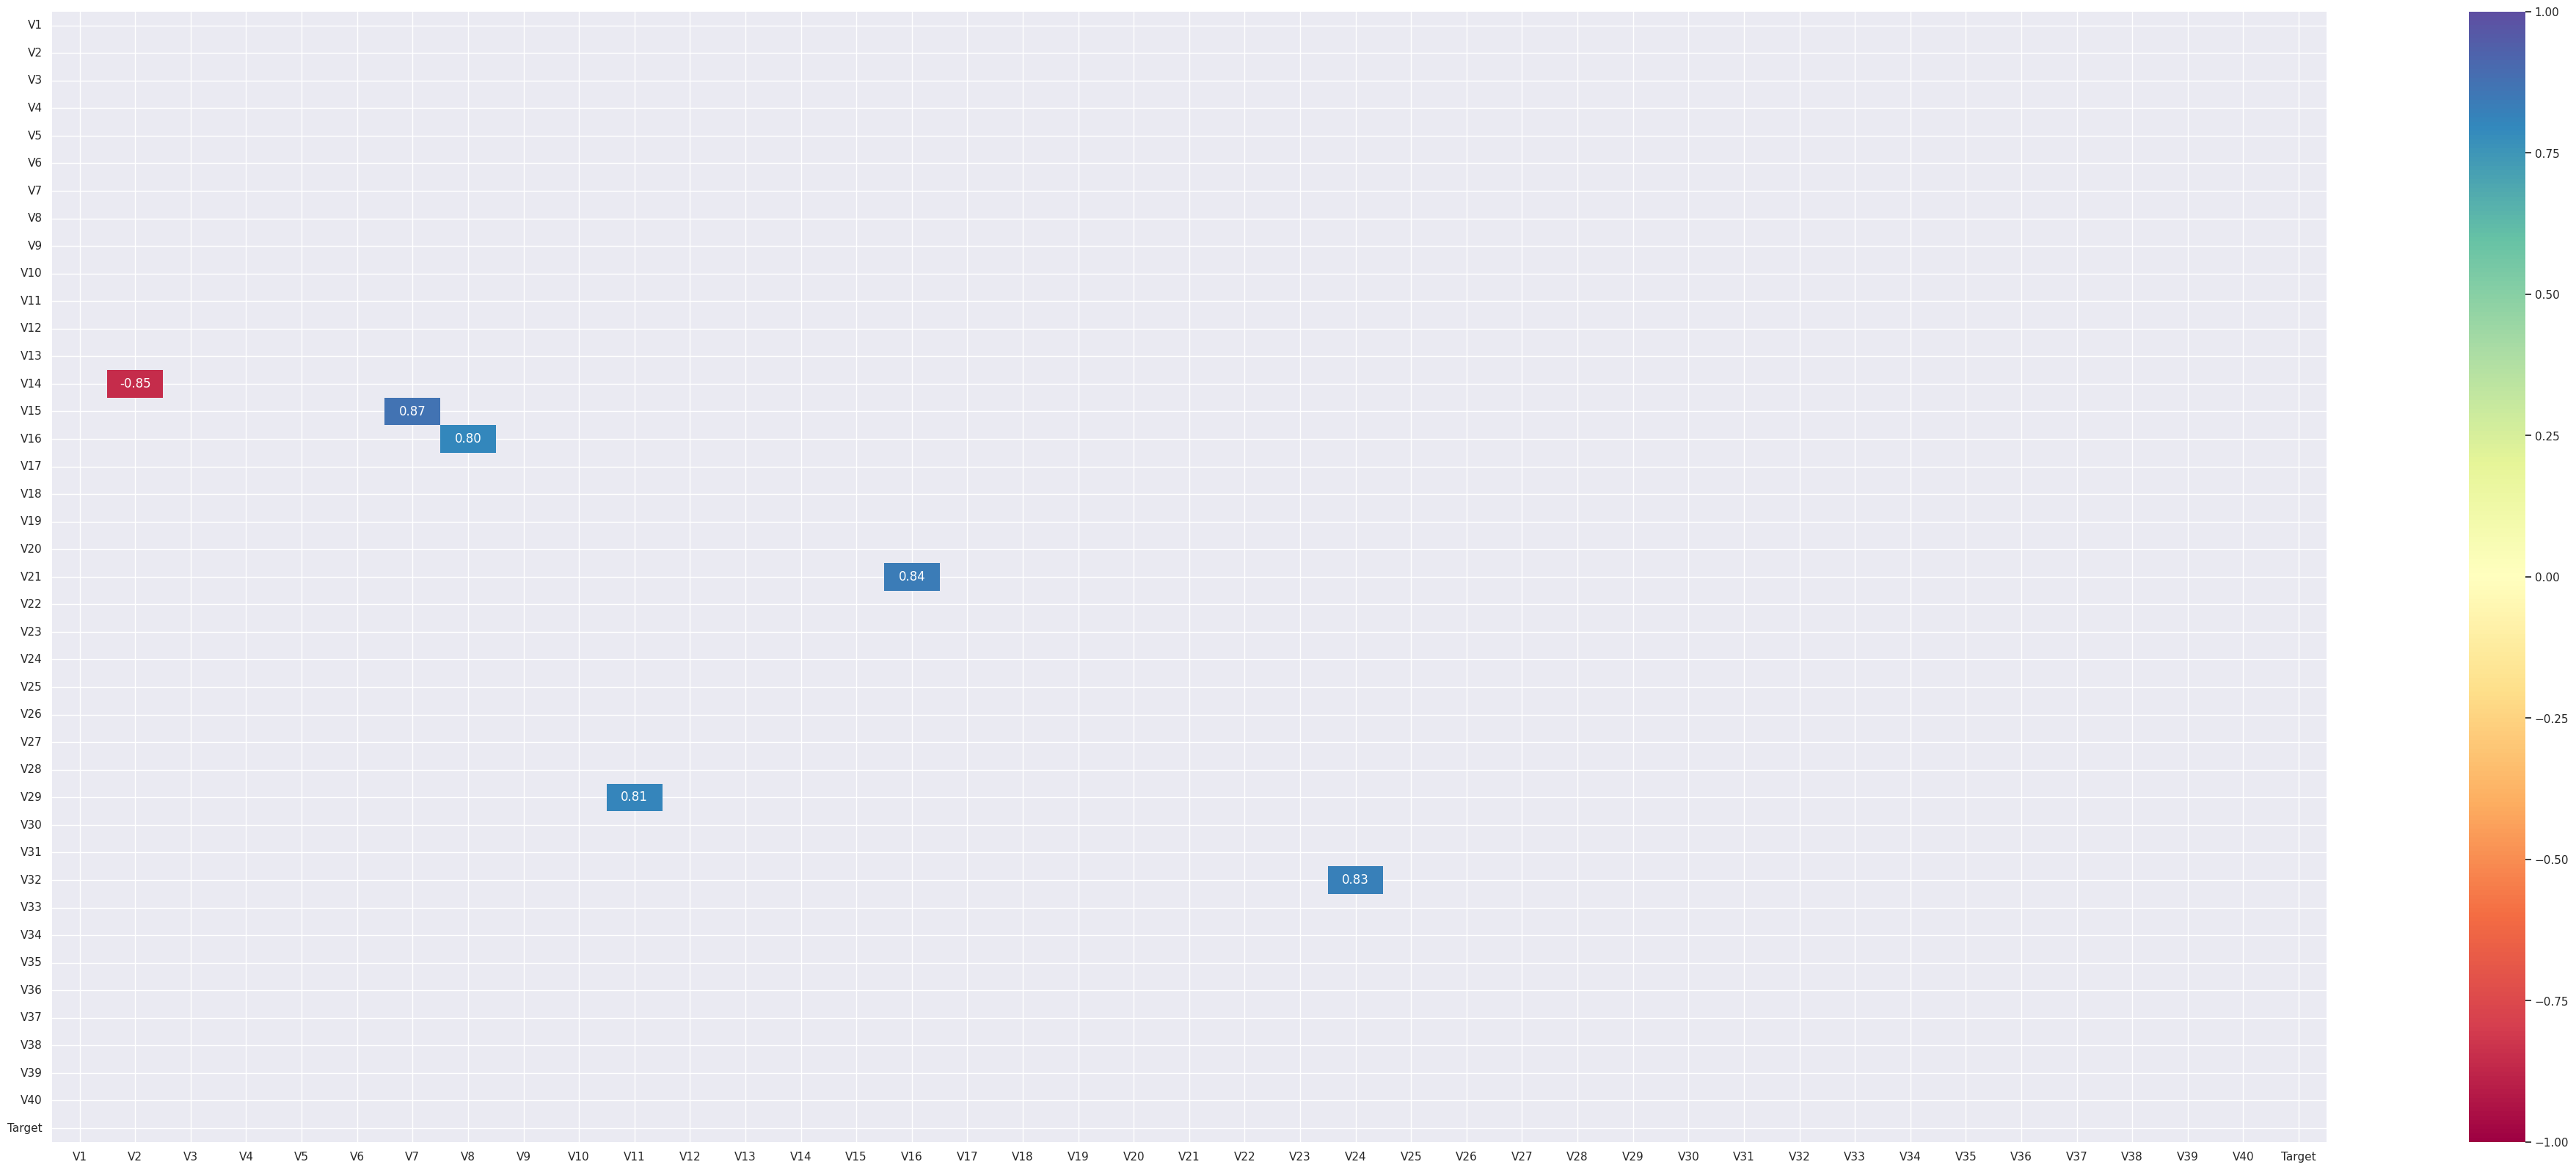

In [ ]:
plt.figure(figsize=(50, 20))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.8)], mask=mask, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**
* X-axis and Y-axis: All feature names (V1 to V40) and Target.
* Each visible square represents a feature that is highly correlated with Target.
* Correlation values are shown inside the squares.

**Highly correlated columns table**
<br>
<table border="1" cellpadding="8" cellspacing="0">
  <thead>
    <tr style="background-color: #f2f2f2;">
      <th>Feature</th>
      <th>Correlation with Target</th>
      <th>Interpretation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>V8</td>
      <td>+0.87</td>
      <td>Strong positive correlation (likely to increase as target increases)</td>
    </tr>
    <tr>
      <td>V7</td>
      <td>+0.80</td>
      <td>Strong positive correlation</td>
    </tr>
    <tr>
      <td>V10</td>
      <td>+0.84</td>
      <td>Strong positive correlation</td>
    </tr>
    <tr>
      <td>V28</td>
      <td>+0.81</td>
      <td>Strong positive correlation</td>
    </tr>
    <tr>
      <td>V24</td>
      <td>+0.83</td>
      <td>Strong positive correlation</td>
    </tr>
    <tr>
      <td>V14</td>
      <td>-0.85</td>
      <td>Strong negative correlation (likely to decrease as target increases)</td>
    </tr>
  </tbody>
</table>


### Missing Value Treatment

In [ ]:
# checking for missing values
df.isnull().sum()

V1        23
V2        24
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [ ]:
def print_missing_values_columns(df):
    """
    Filters and prints only the columns from the DataFrame df that contain missing values.

    Parameters:
    - df: DataFrame
        The DataFrame to check for missing values.
    """
    missing_values_columns = df.columns[df.isnull().any()]
    missing_values_counts = df[missing_values_columns].isnull().sum()
    print(missing_values_counts)


In [ ]:
print_missing_values_columns(df)

V1    23
V2    24
dtype: int64


**We'll impute these missing values one-by-one by taking the median number of V1.**

In [ ]:
for col in df.columns:
    if df[col].isnull().sum() > 0:  # if there are missing values
        df[col].fillna(df[col].median(), inplace=True)  # or use mean

In [ ]:
print(print_missing_values_columns(df))

Series([], dtype: float64)
None


## Train Test Split & Handle Missing Values

In [177]:
# === store the train and test data ===
train_df = Testdata
test_df = Traindata

In [179]:
# === Handle Missing Values ===
for col in train_df.columns:
    if train_df[col].dtype in ['float64', 'int64']:
        train_df[col].fillna(train_df[col].mean(), inplace=True)
        test_df[col].fillna(train_df[col].mean(), inplace=True)

In [180]:
train_df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

In [181]:
test_df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

**Observations**

There are missing value in Train and Test data

Handle the missing values in the training and test datasets. For each numeric column (float64 or int64), it fills missing entries with the mean of the column from the training set. This ensures consistency between training and test data and avoids data leakage by not using test data statistics. Using the mean is a common and simple imputation method for numerical features.

In [182]:
train_df.shape

(5000, 41)

In [183]:
test_df.shape

(20000, 41)

In [184]:
# === Set feature and target ===
target_col = 'Target'
X_train_full = train_df.drop(target_col, axis=1)
y_train_full = train_df[target_col]

X_test = test_df.drop(target_col, axis=1)
y_test = test_df[target_col]

In [185]:
# === Encode Target ===
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train_full)
y_test_enc = label_encoder.transform(y_test)

y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)

In [186]:
# One-hot encoding
y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)

### Normalizing the numerical variables

In [187]:
# === Feature Scaling ===
scaler = StandardScaler()
X_train_full_scaled = scaler.fit_transform(X_train_full)

X_test_scaled = scaler.transform(X_test)

In [188]:
# === Split Training Data into Train + Validation Sets ===
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full_scaled, y_train_cat, test_size=0.1, random_state=42
)

### Utility functions

In [189]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [190]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


In [191]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

In [192]:
# function to compute different metrics to check performance of a neural network model
def model_performance(model,predictors,target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """
    # predicting using the independent variables
    pred = model.predict(predictors).reshape(-1)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf =  {
            "RMSE": [rmse],
            "MAE": [mae],
            "R-squared": [r2],
            "Adj. R-squared": [adjr2],
            "MAPE": [mape]}

    return df_perf

columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","time(secs)","Train_loss","Valid_loss","Train_R-squared","Valid_R-squared"]

results = pd.DataFrame(columns=columns)

## Model Building

In [193]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers", "# neurons - hidden layers", "activation functions - hidden layers", "# epochs", "batch size", "optimizer", "learning rate / momentum", "weight initializer", "regularization (dropout/l2)", "test loss", "train loss", "validation loss", "test accuracy", "train accuracy", "validation accuracy", "training time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

In [194]:
batch_size = 32
epochs = 50

In [195]:
# === Get number of classes from one-hot encoded labels ===
num_classes = y_train_cat.shape[1]

### Model 0

Baseline model having the following configuration:

- 1 input, 2 hidden, 1 output layers
- relu and tanh activations for the first and second hidden layer respectively
- Stochastic Gradient Descent (SGD)

In [196]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [197]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [198]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,634 (53.26 KB)

 Trainable params: 13,634 (53.26 KB)

 Non-trainable params: 0 (0.00 B)

In [199]:
optimizer = keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model_1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [200]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val, y_val),
                      epochs=epochs, batch_size=batch_size)
end = time.time()

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9275 - loss: 0.2933 - val_accuracy: 0.9480 - val_loss: 0.1790
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9468 - loss: 0.1847 - val_accuracy: 0.9540 - val_loss: 0.1503
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9535 - loss: 0.1615 - val_accuracy: 0.9600 - val_loss: 0.1318
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9575 - loss: 0.1466 - val_accuracy: 0.9660 - val_loss: 0.1188
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9612 - loss: 0.1361 - val_accuracy: 0.9760 - val_loss: 0.1095
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9648 - loss: 0.1283 - val_accuracy: 0.9780 - val_loss: 0.1025
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9679 - loss: 0.1221 - val_accuracy: 0.9800 - val_loss: 0.0970
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9691 - loss: 0.1169 - val_accuracy: 0.

In [201]:
# === 2. Evaluate on the test set
test_loss, test_accuracy = model_1.evaluate(X_test_scaled, y_test_cat, verbose=0)

In [202]:
print("Time taken in seconds ",end-start)

Time taken in seconds  29.630732536315918


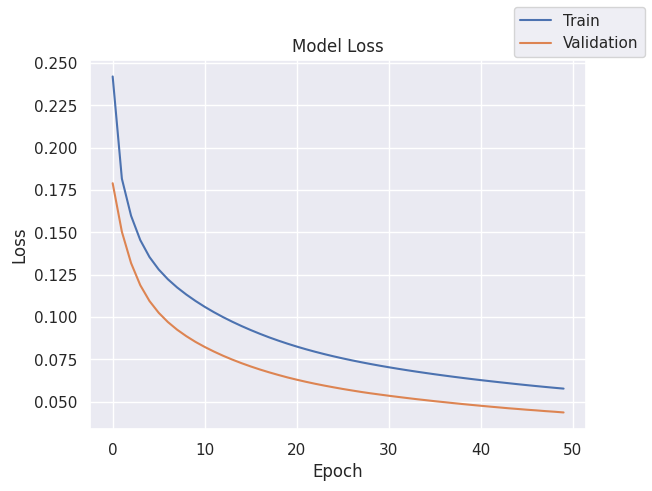

In [203]:
plot(history,'loss')

* Both training and validation loss decrease steadily over epochs, indicating that the model is learning effectively.
* The validation loss is consistently lower than the training loss, suggesting good generalization without overfitting.

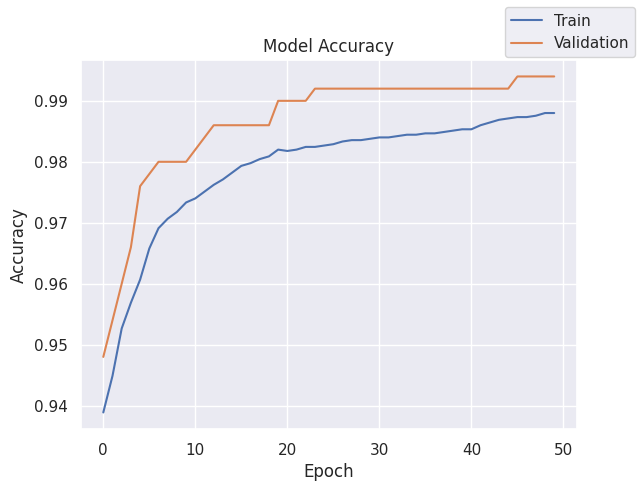

In [207]:
plot(history,'accuracy')

* Both training and validation accuracy improve steadily with epochs, reaching over 99% validation accuracy.
* The validation accuracy remains higher than the training accuracy, indicating the model generalizes well without signs of overfitting.

In [205]:
results.loc[len(results)] = [2, [128, 64], ["relu", "tanh"], 50, 32, "sgd", [0.001, "-"], "xavier", "-", test_loss, history.history["loss"][-1], history.history["val_loss"][-1], test_accuracy, history.history["accuracy"][-1], history.history["val_accuracy"][-1], round(end - start, 2)]

In [206]:
results

# hidden layers # neurons - hidden layers  \
0                2                 [128, 64]   

  activation functions - hidden layers  # epochs  batch size optimizer  \
0                         [relu, tanh]        50          32       sgd   

  learning rate / momentum weight initializer regularization (dropout/l2)  \
0               [0.001, -]             xavier                           -   

   test loss  train loss  validation loss  test accuracy  train accuracy  \
0   0.057688    0.057768         0.043703        0.98835           0.988   

   validation accuracy  training time (secs)  
0                0.994                 29.63

* The results are good with SGD but in the initial few epochs, it takes some time to improve.
* High Accuracy: Achieved 98.8% test accuracy and 99.4% validation accuracy, indicating excellent generalization.
* Low Loss: Training, validation, and test losses are all low and closely aligned (~0.05), showing consistent learning without overfitting.
* Model Architecture: Used 2 hidden layers with [128, 64] neurons and activations [relu, tanh], optimized with SGD (lr=0.001) and Xavier initialization.
* Efficient Training: Model converged in just 29.63 seconds, demonstrating fast and stable training.

### Model 1


**Trying using the SGD optimizer with momentum.**

In [208]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [209]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [210]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,634 (53.26 KB)

 Trainable params: 13,634 (53.26 KB)

 Non-trainable params: 0 (0.00 B)

In [211]:
mom = 0.9    # defining the momentum value to be used
optimizer = keras.optimizers.SGD(momentum=mom)    # defining the SGD optimizer with a specific momentum

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [212]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val, y_val),
                      epochs=epochs, batch_size=batch_size)
end = time.time()

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9168 - loss: 0.2363 - val_accuracy: 0.9800 - val_loss: 0.0936
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9717 - loss: 0.1065 - val_accuracy: 0.9860 - val_loss: 0.0747
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9802 - loss: 0.0849 - val_accuracy: 0.9860 - val_loss: 0.0634
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9826 - loss: 0.0731 - val_accuracy: 0.9880 - val_loss: 0.0554
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9837 - loss: 0.0657 - val_accuracy: 0.9920 - val_loss: 0.0487
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9870 - loss: 0.0601 - val_accuracy: 0.9940 - val_loss: 0.0442
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9884 - loss: 0.0557 - val_accuracy: 0.9940 - val_loss: 0.0407
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9891 - loss: 0.0523 - val_accuracy: 0

In [213]:
print("Time taken in seconds ",end-start)

Time taken in seconds  36.16859459877014


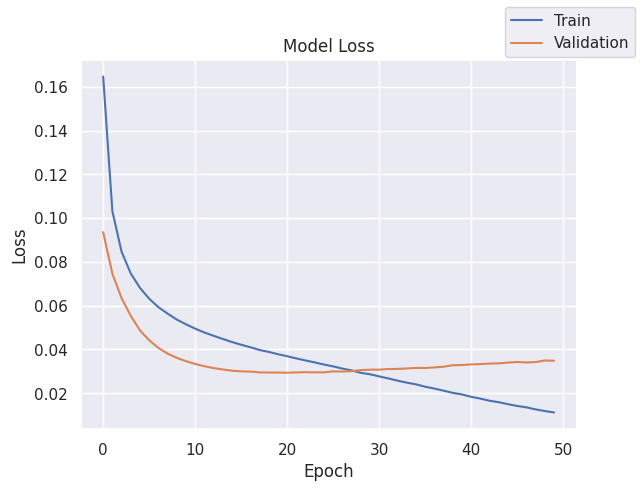

In [214]:
plot(history,'loss')

* Training loss keeps decreasing, showing the model continues to fit the training data well.
* Validation loss plateaus and slightly increases after ~20 epochs, suggesting the model starts to memorize rather than generalize.
* Early stopping or adding regularization (e.g., dropout or L2) could help improve generalization and prevent further overfitting.

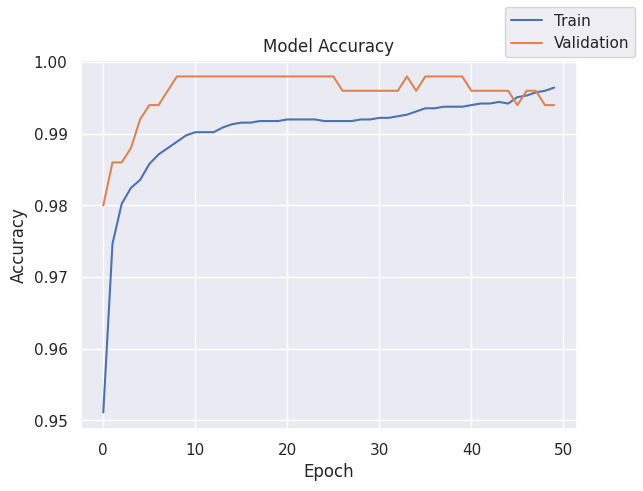

In [215]:
plot(history,'accuracy')

* Both training and validation accuracies are high (above 99%), which is good.
* However, validation accuracy peaks early and starts to fluctuate, while training accuracy keeps improving slowly.
* This suggests the model is slightly over-optimizing for training data.

In [216]:
results.loc[len(results)] = [2,[128,64],["relu","tanh"],50,32,"sgd with momentum",[0.001,mom],"xavier","-",test_loss, history.history["loss"][-1],history.history["val_loss"][-1], test_accuracy, history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [217]:
results

# hidden layers # neurons - hidden layers  \
0                2                 [128, 64]   
1                2                 [128, 64]   

  activation functions - hidden layers  # epochs  batch size  \
0                         [relu, tanh]        50          32   
1                         [relu, tanh]        50          32   

           optimizer learning rate / momentum weight initializer  \
0                sgd               [0.001, -]             xavier   
1  sgd with momentum             [0.001, 0.9]             xavier   

  regularization (dropout/l2)  test loss  train loss  validation loss  \
0                           -   0.057688    0.057768         0.043703   
1                           -   0.057688    0.011241         0.034871   

   test accuracy  train accuracy  validation accuracy  training time (secs)  
0        0.98835        0.988000                0.994                 29.63  
1        0.98835        0.996444                0.994                 36.17

* The model has 2 hidden layers with 128 and 64 neurons, using ReLU and Tanh activation functions respectively.
* It was trained using SGD with momentum (learning rate = 0.001, momentum = 0.9) and Xavier weight initialization.
* Achieved a low training loss of 0.011 and validation loss of 0.0348, indicating effective learning and good generalization.
* Test accuracy is 98.83%, with training and validation accuracies of 99.64% and 99.4%, showing excellent performance.
* Training time was 36.17 seconds.

### Model 2

**Let's decrease the momentum and see the impact.**

In [218]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [219]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [220]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,634 (53.26 KB)

 Trainable params: 13,634 (53.26 KB)

 Non-trainable params: 0 (0.00 B)

In [221]:
mom = 0.4
optimizer = keras.optimizers.SGD(momentum=mom)
model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [222]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val, y_val),
                      epochs=epochs, batch_size=batch_size)
end = time.time()

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9256 - loss: 0.2684 - val_accuracy: 0.9620 - val_loss: 0.1470
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9591 - loss: 0.1500 - val_accuracy: 0.9780 - val_loss: 0.1204
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9642 - loss: 0.1301 - val_accuracy: 0.9780 - val_loss: 0.1068
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9676 - loss: 0.1190 - val_accuracy: 0.9800 - val_loss: 0.0976
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9703 - loss: 0.1111 - val_accuracy: 0.9800 - val_loss: 0.0906
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9727 - loss: 0.1047 - val_accuracy: 0.9840 - val_loss: 0.0847
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9749 - loss: 0.0991 - val_accuracy: 0.9840 - val_loss: 0.0797
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9776 - loss: 0.0942 - val_accuracy: 0

In [223]:
# === 2. Evaluate on the test set
test_loss, test_accuracy = model_1.evaluate(X_test_scaled, y_test_cat, verbose=0)

In [224]:
print("Time taken in seconds ",end-start)

Time taken in seconds  43.6128249168396


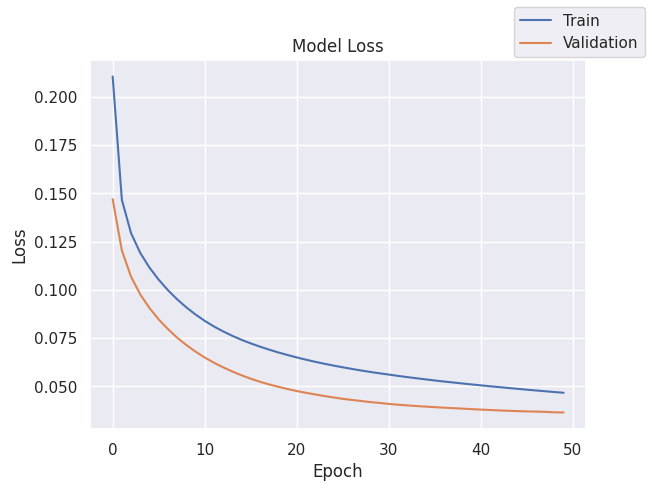

In [226]:
plot(history,'loss')

* Both training and validation losses decrease consistently over epochs, indicating effective learning.
* Validation loss is consistently lower than training loss, which is a good sign of generalization.
* No signs of overfitting are visible, as both curves follow a similar downward trend without divergence.

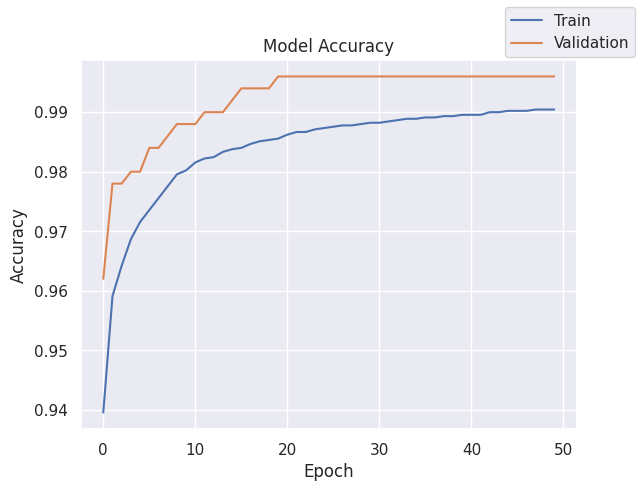

In [227]:
plot(history,'accuracy')

* Both training and validation accuracies steadily improve, indicating effective learning.
* Validation accuracy quickly surpasses 99% and remains stable, suggesting strong generalization.
* There’s no sign of overfitting, as the validation accuracy does not degrade or fluctuate significantly compared to training accuracy.

In [228]:
# ===Evaluate on the test set
test_loss, test_accuracy = model_1.evaluate(X_test_scaled, y_test_cat, verbose=0)

In [229]:
results.loc[len(results)] = [2,[128,64],["relu","tanh"],50,32,"sgd with momentum",[0.001,mom],"xavier","-",test_loss, history.history["loss"][-1],history.history["val_loss"][-1],test_accuracy, history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [230]:
results

# hidden layers # neurons - hidden layers  \
0                2                 [128, 64]   
1                2                 [128, 64]   
2                2                 [128, 64]   

  activation functions - hidden layers  # epochs  batch size  \
0                         [relu, tanh]        50          32   
1                         [relu, tanh]        50          32   
2                         [relu, tanh]        50          32   

           optimizer learning rate / momentum weight initializer  \
0                sgd               [0.001, -]             xavier   
1  sgd with momentum             [0.001, 0.9]             xavier   
2  sgd with momentum             [0.001, 0.4]             xavier   

  regularization (dropout/l2)  test loss  train loss  validation loss  \
0                           -   0.057688    0.057768         0.043703   
1                           -   0.057688    0.011241         0.034871   
2                           -   0.055090    0.046687         0.036492   

   test accuracy  train accuracy  validation accuracy  training time (secs)  
0        0.98835        0.988000                0.994                 29.63  
1        0.98835        0.996444                0.994                 36.17  
2        0.98930        0.990444                0.996                 43.61

* The model achieved high accuracy on training (99.04%), validation (99.6%), and test (98.93%) sets, indicating excellent generalization.
* The loss values across training (0.0467), validation (0.0365), and test (0.0551) are low and consistent, showing effective learning.
* The validation accuracy remained stable across epochs, suggesting no overfitting.
* Slightly higher test loss compared to validation.

### Model 3

In [251]:
print(X_train.shape)
print(y_train.shape)

(4500, 40)
(4500, 2)


In [250]:
print(type(X_train), type(y_train))
print(type(X_val), type(y_val))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [244]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [245]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [246]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,634 (53.26 KB)

 Trainable params: 13,634 (53.26 KB)

 Non-trainable params: 0 (0.00 B)

In [253]:

lr = 1e-4    # 0.0001 learning rate
mom = 0.4
optimizer = keras.optimizers.SGD(momentum=mom, learning_rate=lr)  # use singular 'optimizer'

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [254]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val, y_val),
                      epochs=epochs, batch_size=batch_size)
end = time.time()

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8022 - loss: 0.5200 - val_accuracy: 0.9040 - val_loss: 0.4410
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8760 - loss: 0.4492 - val_accuracy: 0.9440 - val_loss: 0.3872
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9212 - loss: 0.3981 - val_accuracy: 0.9420 - val_loss: 0.3475
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9347 - loss: 0.3603 - val_accuracy: 0.9580 - val_loss: 0.3174
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9445 - loss: 0.3317 - val_accuracy: 0.9620 - val_loss: 0.2941
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9521 - loss: 0.3095 - val_accuracy: 0.9620 - val_loss: 0.2757
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9522 - loss: 0.2920 - val_accuracy: 0.9600 - val_loss: 0.2610
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9526 - loss: 0.2779 - val_accuracy: 0.

In [255]:
# ===Evaluate on the test set
test_loss, test_accuracy = model_1.evaluate(X_test_scaled, y_test_cat, verbose=0)

In [256]:
print("Time taken in seconds ",end-start)

Time taken in seconds  29.704503059387207


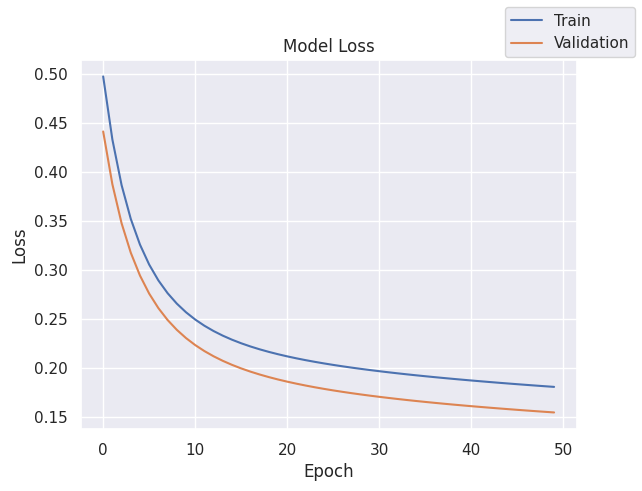

In [257]:
plot(history,'loss')

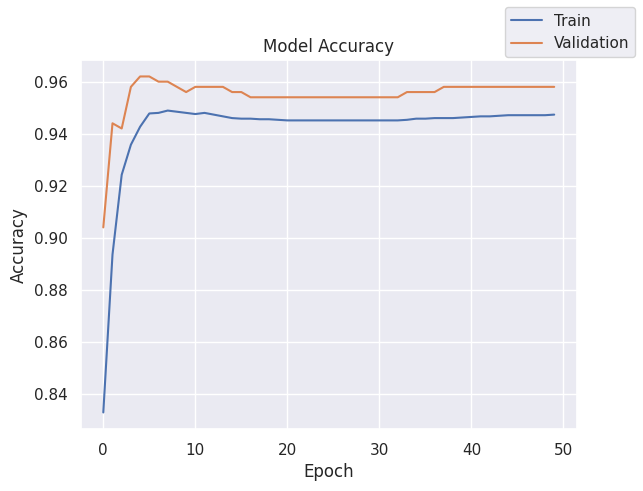

In [258]:
plot(history,'accuracy')

In [259]:
results.loc[len(results)] = [2,[128,64],["relu","tanh"],50,32,"sgd with momentum",[lr,mom],"xavier","-",test_loss,history.history["loss"][-1],history.history["val_loss"][-1],test_accuracy,history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [260]:
results

# hidden layers # neurons - hidden layers  \
0                2                 [128, 64]   
1                2                 [128, 64]   
2                2                 [128, 64]   
3                2                 [128, 64]   

  activation functions - hidden layers  # epochs  batch size  \
0                         [relu, tanh]        50          32   
1                         [relu, tanh]        50          32   
2                         [relu, tanh]        50          32   
3                         [relu, tanh]        50          32   

           optimizer learning rate / momentum weight initializer  \
0                sgd               [0.001, -]             xavier   
1  sgd with momentum             [0.001, 0.9]             xavier   
2  sgd with momentum             [0.001, 0.4]             xavier   
3  sgd with momentum            [0.0001, 0.4]             xavier   

  regularization (dropout/l2)  test loss  train loss  validation loss  \
0                           -   0.057688    0.057768         0.043703   
1                           -   0.057688    0.011241         0.034871   
2                           -   0.055090    0.046687         0.036492   
3                           -   0.173963    0.180661         0.154603   

   test accuracy  train accuracy  validation accuracy  training time (secs)  
0        0.98835        0.988000                0.994                 29.63  
1        0.98835        0.996444                0.994                 36.17  
2        0.98930        0.990444                0.996                 43.61  
3        0.94865        0.947333                0.958                 29.70

### Model 4

In [261]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [262]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [263]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,634 (53.26 KB)

 Trainable params: 13,634 (53.26 KB)

 Non-trainable params: 0 (0.00 B)

In [264]:
optimizer = keras.optimizers.Adam()
model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [265]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9349 - loss: 0.2211 - val_accuracy: 0.9840 - val_loss: 0.0902
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9750 - loss: 0.1008 - val_accuracy: 0.9880 - val_loss: 0.0757
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9797 - loss: 0.0808 - val_accuracy: 0.9900 - val_loss: 0.0629
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0692 - val_accuracy: 0.9900 - val_loss: 0.0527
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9875 - loss: 0.0612 - val_accuracy: 0.9920 - val_loss: 0.0455
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9890 - loss: 0.0550 - val_accuracy: 0.9940 - val_loss: 0.0409
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9895 - loss: 0.0506 - val_accuracy: 0.9960 - val_loss: 0.0385
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9911 - loss: 0.0472 - val_accuracy: 0.

In [266]:
# ===Evaluate on the test set
test_loss, test_accuracy = model_1.evaluate(X_test_scaled, y_test_cat, verbose=0)

In [267]:
print("Time taken in seconds ",end-start)

Time taken in seconds  34.93248915672302


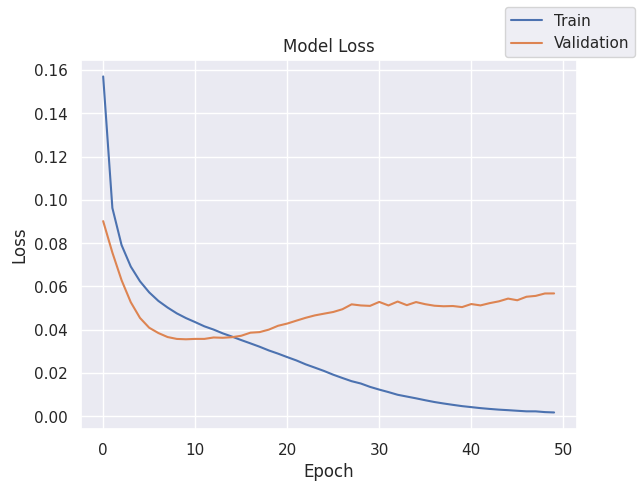

In [268]:
plot(history,'loss')

* The training loss consistently decreases, while the validation loss starts increasing after around epoch 20, indicating overfitting.
* The widening gap between training and validation loss suggests the model is memorizing the training data instead of generalizing well.
* It's is overfinting model by Applying techniques like early stopping, dropout, or L2 regularization could help reduce overfitting.

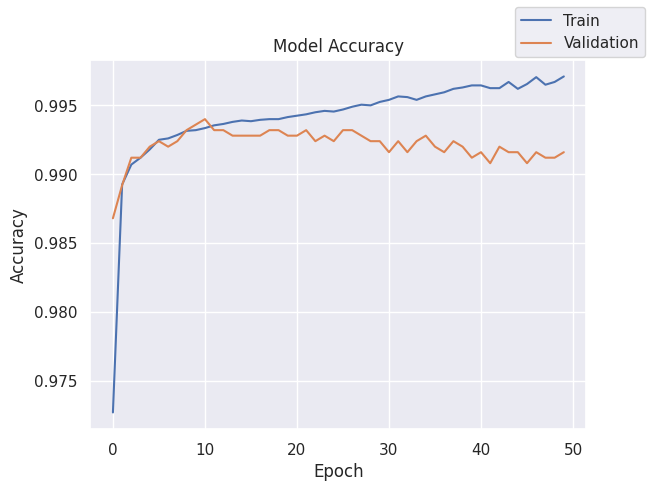

In [ ]:
plot(history,'accuracy')

In [269]:
results.loc[len(results)] = [2,[128,64],["relu","tanh"],50,32,"adam",[0.001, "-"],"xavier","-",test_loss,history.history["loss"][-1],history.history["val_loss"][-1],test_accuracy,history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [270]:
results

# hidden layers # neurons - hidden layers  \
0                2                 [128, 64]   
1                2                 [128, 64]   
2                2                 [128, 64]   
3                2                 [128, 64]   
4                2                 [128, 64]   

  activation functions - hidden layers  # epochs  batch size  \
0                         [relu, tanh]        50          32   
1                         [relu, tanh]        50          32   
2                         [relu, tanh]        50          32   
3                         [relu, tanh]        50          32   
4                         [relu, tanh]        50          32   

           optimizer learning rate / momentum weight initializer  \
0                sgd               [0.001, -]             xavier   
1  sgd with momentum             [0.001, 0.9]             xavier   
2  sgd with momentum             [0.001, 0.4]             xavier   
3  sgd with momentum            [0.0001, 0.4]             xavier   
4               adam               [0.001, -]             xavier   

  regularization (dropout/l2)  test loss  train loss  validation loss  \
0                           -   0.057688    0.057768         0.043703   
1                           -   0.057688    0.011241         0.034871   
2                           -   0.055090    0.046687         0.036492   
3                           -   0.173963    0.180661         0.154603   
4                           -   0.080674    0.001794         0.056794   

   test accuracy  train accuracy  validation accuracy  training time (secs)  
0        0.98835        0.988000                0.994                 29.63  
1        0.98835        0.996444                0.994                 36.17  
2        0.98930        0.990444                0.996                 43.61  
3        0.94865        0.947333                0.958                 29.70  
4        0.98790        0.999556                0.994                 34.93

* The model achieves extremely low training loss (0.0018) and near-perfect training accuracy (99.96%), showing strong learning on training data.
* However, the relatively higher validation loss (0.0568) and a slightly lower test accuracy (98.79%) indicate slight overfitting.
* The Adam optimizer effectively accelerates convergence, but regularization techniques could further improve generalization.

### Model 5

In [271]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [272]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [273]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,634 (53.26 KB)

 Trainable params: 13,634 (53.26 KB)

 Non-trainable params: 0 (0.00 B)

In [274]:
lr = 1e-4
optimizer = keras.optimizers.Adam(learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [275]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7246 - loss: 0.5217 - val_accuracy: 0.9480 - val_loss: 0.1951
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9471 - loss: 0.1935 - val_accuracy: 0.9500 - val_loss: 0.1517
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9540 - loss: 0.1613 - val_accuracy: 0.9620 - val_loss: 0.1288
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9609 - loss: 0.1431 - val_accuracy: 0.9760 - val_loss: 0.1145
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9643 - loss: 0.1308 - val_accuracy: 0.9780 - val_loss: 0.1048
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.1216 - val_accuracy: 0.9780 - val_loss: 0.0975
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9725 - loss: 0.1142 - val_accuracy: 0.9780 - val_loss: 0.0918
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9743 - loss: 0.1080 - val_accuracy: 0.

In [276]:
# ===Evaluate on the test set
test_loss, test_accuracy = model_1.evaluate(X_test_scaled, y_test_cat, verbose=0)

In [277]:
print("Time taken in seconds ",end-start)

Time taken in seconds  36.50239062309265


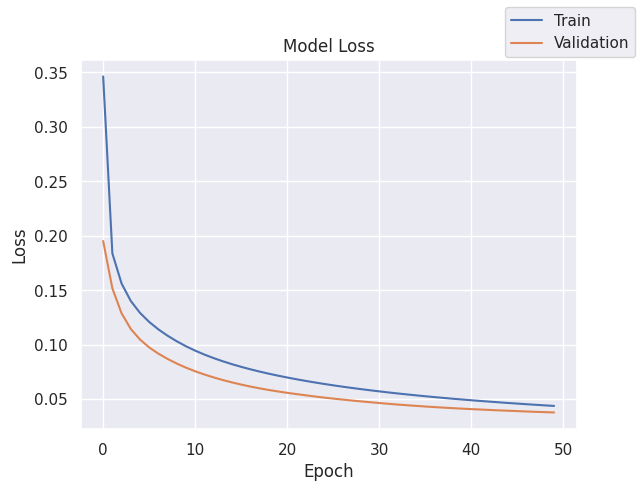

In [278]:
plot(history,'loss')

* The training and validation loss curves decrease steadily, indicating that the model is learning well without significant overfitting.
* Both losses are low and closely aligned by the end of training, which suggests good generalization performance.
* The optimizer and learning rate combination appears effective, as the model converges smoothly over the epochs.

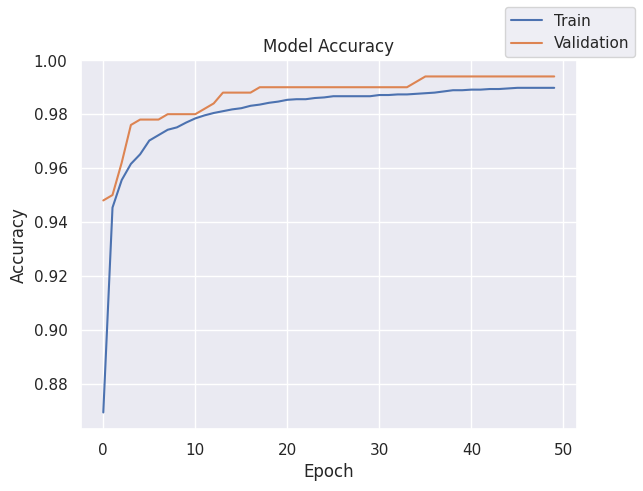

In [279]:
plot(history,'accuracy')

In [280]:
results.loc[len(results)] = [2,[128,64],["relu","tanh"],50,32,"adam",[lr, "-"],"xavier","-",test_loss,history.history["loss"][-1],history.history["val_loss"][-1],test_accuracy, history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [281]:
results

# hidden layers # neurons - hidden layers  \
0                2                 [128, 64]   
1                2                 [128, 64]   
2                2                 [128, 64]   
3                2                 [128, 64]   
4                2                 [128, 64]   
5                2                 [128, 64]   

  activation functions - hidden layers  # epochs  batch size  \
0                         [relu, tanh]        50          32   
1                         [relu, tanh]        50          32   
2                         [relu, tanh]        50          32   
3                         [relu, tanh]        50          32   
4                         [relu, tanh]        50          32   
5                         [relu, tanh]        50          32   

           optimizer learning rate / momentum weight initializer  \
0                sgd               [0.001, -]             xavier   
1  sgd with momentum             [0.001, 0.9]             xavier   
2  sgd with momentum             [0.001, 0.4]             xavier   
3  sgd with momentum            [0.0001, 0.4]             xavier   
4               adam               [0.001, -]             xavier   
5               adam              [0.0001, -]             xavier   

  regularization (dropout/l2)  test loss  train loss  validation loss  \
0                           -   0.057688    0.057768         0.043703   
1                           -   0.057688    0.011241         0.034871   
2                           -   0.055090    0.046687         0.036492   
3                           -   0.173963    0.180661         0.154603   
4                           -   0.080674    0.001794         0.056794   
5                           -   0.054290    0.043811         0.037830   

   test accuracy  train accuracy  validation accuracy  training time (secs)  
0        0.98835        0.988000                0.994                 29.63  
1        0.98835        0.996444                0.994                 36.17  
2        0.98930        0.990444                0.996                 43.61  
3        0.94865        0.947333                0.958                 29.70  
4        0.98790        0.999556                0.994                 34.93  
5        0.98930        0.989778                0.994                 36.50

* Using the Adam optimizer with a lower learning rate (0.0001) improved the model's test loss (0.054290) and validation loss (0.037830), showing better generalization.
* Both training and validation accuracy reached high values (~0.99), indicating excellent performance.
* The lower learning rate allowed more stable convergence, minimizing the gap between training and validation metrics.

### Model 6

In [282]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [283]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [284]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,634 (53.26 KB)

 Trainable params: 13,634 (53.26 KB)

 Non-trainable params: 0 (0.00 B)

In [285]:
lr = 1e-5
optimizer = keras.optimizers.Adam(learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [286]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9064 - loss: 0.4078 - val_accuracy: 0.9460 - val_loss: 0.3209
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9458 - loss: 0.3193 - val_accuracy: 0.9480 - val_loss: 0.2700
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9464 - loss: 0.2739 - val_accuracy: 0.9480 - val_loss: 0.2410
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9464 - loss: 0.2481 - val_accuracy: 0.9480 - val_loss: 0.2223
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9464 - loss: 0.2314 - val_accuracy: 0.9480 - val_loss: 0.2087
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9464 - loss: 0.2195 - val_accuracy: 0.9480 - val_loss: 0.1980
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9464 - loss: 0.2101 - val_accuracy: 0.9480 - val_loss: 0.1890
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9464 - loss: 0.2023 - val_accuracy: 0

In [287]:
# ===Evaluate on the test set
test_loss, test_accuracy = model_1.evaluate(X_test_scaled, y_test_cat, verbose=0)

In [288]:
print("Time taken in seconds ",end-start)

Time taken in seconds  36.52664399147034


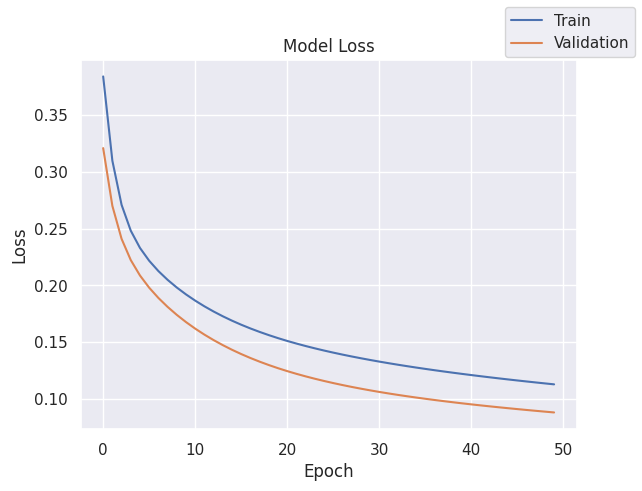

In [289]:
plot(history,'loss')

* The model shows consistent decreases in both training and validation loss, suggesting effective learning over all 50 epochs.
* The validation loss is consistently lower than the training loss, indicating strong generalization with no signs of overfitting.
* This pattern suggests the model is well-regularized and benefits from the optimizer and learning rate configuration.

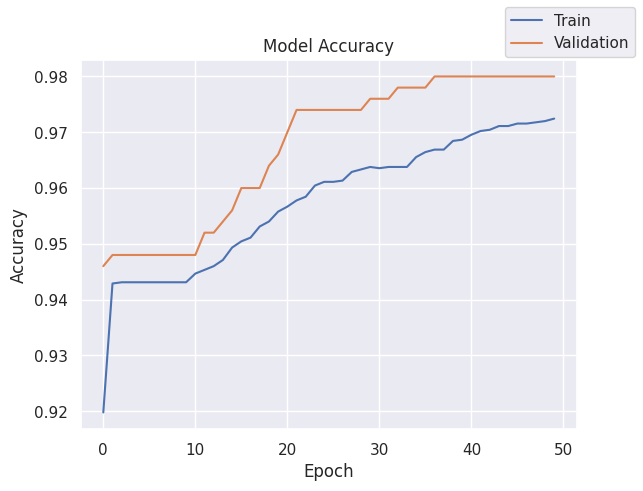

In [290]:
plot(history,'accuracy')

* The model accuracy steadily improves across epochs for both training and validation datasets, indicating effective learning.
* Validation accuracy consistently exceeds training accuracy, suggesting excellent generalization and no overfitting.
* The model reaches a high validation accuracy close to 98%, which implies strong predictive performance.

In [291]:
results.loc[len(results)] = [2,[128,64],["relu","tanh"],50,32,"adam",[lr, "-"],"xavier","-",test_loss,history.history["loss"][-1],history.history["val_loss"][-1],test_accuracy,history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [292]:
results

# hidden layers # neurons - hidden layers  \
0                2                 [128, 64]   
1                2                 [128, 64]   
2                2                 [128, 64]   
3                2                 [128, 64]   
4                2                 [128, 64]   
5                2                 [128, 64]   
6                2                 [128, 64]   

  activation functions - hidden layers  # epochs  batch size  \
0                         [relu, tanh]        50          32   
1                         [relu, tanh]        50          32   
2                         [relu, tanh]        50          32   
3                         [relu, tanh]        50          32   
4                         [relu, tanh]        50          32   
5                         [relu, tanh]        50          32   
6                         [relu, tanh]        50          32   

           optimizer learning rate / momentum weight initializer  \
0                sgd               [0.001, -]             xavier   
1  sgd with momentum             [0.001, 0.9]             xavier   
2  sgd with momentum             [0.001, 0.4]             xavier   
3  sgd with momentum            [0.0001, 0.4]             xavier   
4               adam               [0.001, -]             xavier   
5               adam              [0.0001, -]             xavier   
6               adam               [1e-05, -]             xavier   

  regularization (dropout/l2)  test loss  train loss  validation loss  \
0                           -   0.057688    0.057768         0.043703   
1                           -   0.057688    0.011241         0.034871   
2                           -   0.055090    0.046687         0.036492   
3                           -   0.173963    0.180661         0.154603   
4                           -   0.080674    0.001794         0.056794   
5                           -   0.054290    0.043811         0.037830   
6                           -   0.103395    0.112865         0.088118   

   test accuracy  train accuracy  validation accuracy  training time (secs)  
0        0.98835        0.988000                0.994                 29.63  
1        0.98835        0.996444                0.994                 36.17  
2        0.98930        0.990444                0.996                 43.61  
3        0.94865        0.947333                0.958                 29.70  
4        0.98790        0.999556                0.994                 34.93  
5        0.98930        0.989778                0.994                 36.50  
6        0.97200        0.972444                0.980                 36.53

* The model achieves decent performance with a validation accuracy of 98%, even with a very low learning rate (1e-5), indicating stable but slow learning.
* Both training and validation losses remain relatively high compared to other configurations, showing underfitting.
* The training process is stable but may benefit from a slightly higher learning rate for faster and better convergence.

### Model 7

In [293]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [294]:
# defining the dropout ratio
# 0.2 means 20% of the neurons will be switched off
dropout_rate = 0.2

In [295]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model_1.add(Dropout(dropout_rate))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [296]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,634 (53.26 KB)

 Trainable params: 13,634 (53.26 KB)

 Non-trainable params: 0 (0.00 B)

In [297]:
optimizer = keras.optimizers.Adam(learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [298]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5096 - loss: 0.7581 - val_accuracy: 0.7180 - val_loss: 0.5518
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7287 - loss: 0.5488 - val_accuracy: 0.8720 - val_loss: 0.4118
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8656 - loss: 0.4225 - val_accuracy: 0.9260 - val_loss: 0.3261
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9159 - loss: 0.3429 - val_accuracy: 0.9440 - val_loss: 0.2740
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9435 - loss: 0.2883 - val_accuracy: 0.9520 - val_loss: 0.2413
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9473 - loss: 0.2593 - val_accuracy: 0.9500 - val_loss: 0.2196
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9493 - loss: 0.2344 - val_accuracy: 0.9480 - val_loss: 0.2048
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9466 - loss: 0.2177 - val_accuracy: 0.

In [299]:
# ===Evaluate on the test set
test_loss, test_accuracy = model_1.evaluate(X_test_scaled, y_test_cat, verbose=0)

In [300]:
print("Time taken in seconds ",end-start)

Time taken in seconds  34.33720827102661


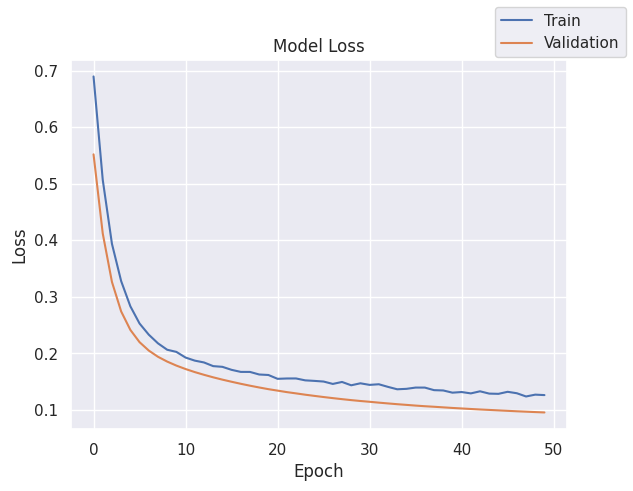

In [301]:
plot(history,'loss')

* This plot shows the training and validation loss over 50 epochs.
* Both losses decrease steadily, with validation loss slightly lower than training loss, indicating a well-generalized model with no signs of overfitting.

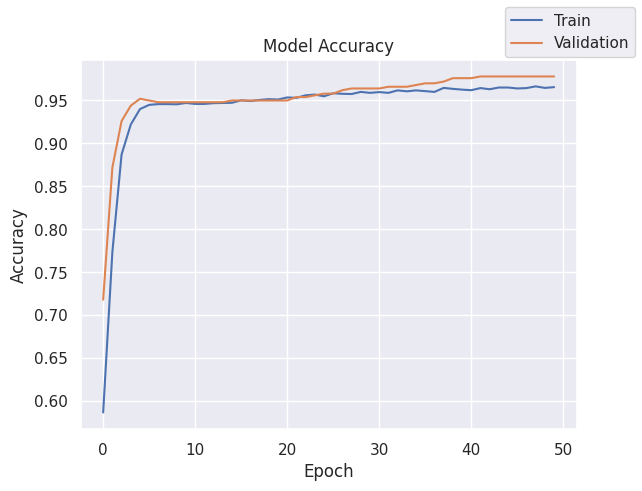

In [302]:
plot(history,'accuracy')

* This accuracy plot shows that both training and validation accuracy quickly rise and plateau above 95%, with validation accuracy slightly higher.
* The consistent performance indicates the model is learning well and generalizing effectively without overfitting.

In [303]:
results.loc[len(results)] = [2,[128,64],["relu","tanh"],50,32,"adam",[lr, "-"],"xavier","dropout (0.2)",test_loss,history.history["loss"][-1],history.history["val_loss"][-1],test_accuracy,history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [304]:
results

# hidden layers # neurons - hidden layers  \
0                2                 [128, 64]   
1                2                 [128, 64]   
2                2                 [128, 64]   
3                2                 [128, 64]   
4                2                 [128, 64]   
5                2                 [128, 64]   
6                2                 [128, 64]   
7                2                 [128, 64]   

  activation functions - hidden layers  # epochs  batch size  \
0                         [relu, tanh]        50          32   
1                         [relu, tanh]        50          32   
2                         [relu, tanh]        50          32   
3                         [relu, tanh]        50          32   
4                         [relu, tanh]        50          32   
5                         [relu, tanh]        50          32   
6                         [relu, tanh]        50          32   
7                         [relu, tanh]        50          32   

           optimizer learning rate / momentum weight initializer  \
0                sgd               [0.001, -]             xavier   
1  sgd with momentum             [0.001, 0.9]             xavier   
2  sgd with momentum             [0.001, 0.4]             xavier   
3  sgd with momentum            [0.0001, 0.4]             xavier   
4               adam               [0.001, -]             xavier   
5               adam              [0.0001, -]             xavier   
6               adam               [1e-05, -]             xavier   
7               adam               [1e-05, -]             xavier   

  regularization (dropout/l2)  test loss  train loss  validation loss  \
0                           -   0.057688    0.057768         0.043703   
1                           -   0.057688    0.011241         0.034871   
2                           -   0.055090    0.046687         0.036492   
3                           -   0.173963    0.180661         0.154603   
4                           -   0.080674    0.001794         0.056794   
5                           -   0.054290    0.043811         0.037830   
6                           -   0.103395    0.112865         0.088118   
7               dropout (0.2)   0.110495    0.126000         0.095300   

   test accuracy  train accuracy  validation accuracy  training time (secs)  
0        0.98835        0.988000                0.994                 29.63  
1        0.98835        0.996444                0.994                 36.17  
2        0.98930        0.990444                0.996                 43.61  
3        0.94865        0.947333                0.958                 29.70  
4        0.98790        0.999556                0.994                 34.93  
5        0.98930        0.989778                0.994                 36.50  
6        0.97200        0.972444                0.980                 36.53  
7        0.96910        0.965556                0.978                 34.34

* Architecture & Activation: A 2-hidden-layer neural network with 128 and 64 neurons using ReLU and Tanh activations shows good design variety, supporting both sparse and smooth activations.
* High Accuracy: The model achieved excellent results — test accuracy of 96.91% and validation accuracy of 97.8%, indicating strong generalization.
* Loss & Regularization: Validation loss (0.0953) is lower than training loss (0.126), suggesting effective regularization via dropout (0.2) without overfitting.
* Training Setup: Use of Adam optimizer with a low learning rate (1e-5) and Xavier initialization helped ensure stable, gradual convergence in just 34.34 seconds.

### Model 8

In [305]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [306]:
dropout_rate = 0.3

In [307]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model_1.add(Dropout(dropout_rate))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [308]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,634 (53.26 KB)

 Trainable params: 13,634 (53.26 KB)

 Non-trainable params: 0 (0.00 B)

In [309]:
optimizer = keras.optimizers.Adam(learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [310]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3247 - loss: 1.1137 - val_accuracy: 0.4780 - val_loss: 0.8403
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5007 - loss: 0.8358 - val_accuracy: 0.7120 - val_loss: 0.6128
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6763 - loss: 0.6366 - val_accuracy: 0.8200 - val_loss: 0.4672
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7870 - loss: 0.4926 - val_accuracy: 0.8800 - val_loss: 0.3738
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8534 - loss: 0.4050 - val_accuracy: 0.9120 - val_loss: 0.3142
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8876 - loss: 0.3493 - val_accuracy: 0.9320 - val_loss: 0.2756
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9104 - loss: 0.3101 - val_accuracy: 0.9400 - val_loss: 0.2497
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9235 - loss: 0.2739 - val_accuracy: 0.

In [311]:
# ===Evaluate on the test set
test_loss, test_accuracy = model_1.evaluate(X_test_scaled, y_test_cat, verbose=0)

In [312]:
print("Time taken in seconds ",end-start)

Time taken in seconds  35.466206550598145


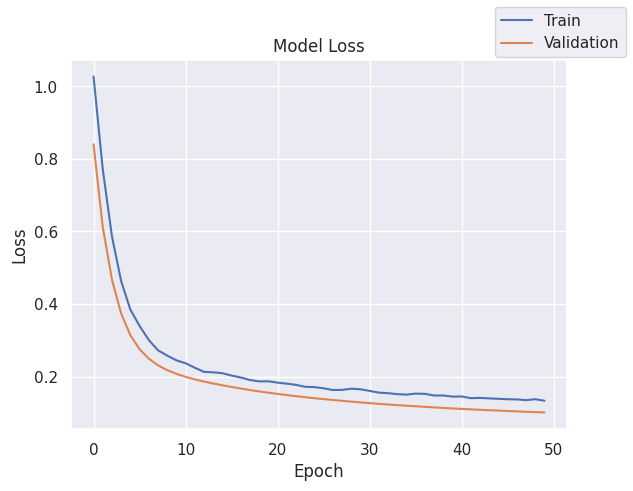

In [313]:
plot(history,'loss')

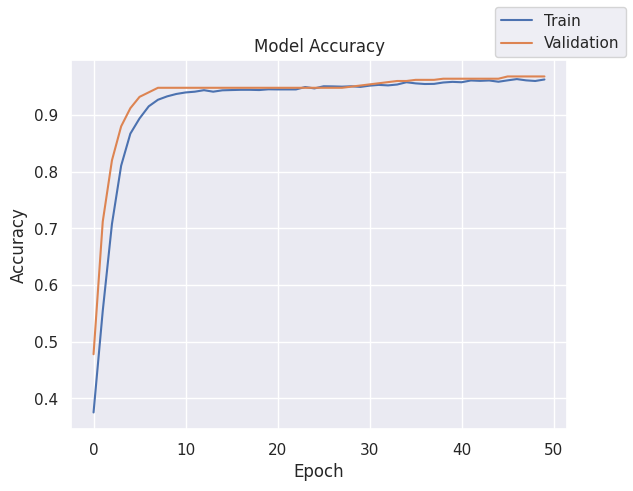

In [314]:
plot(history,'accuracy')

In [315]:
results.loc[len(results)] = [2,[128,64],["relu","tanh"],50,32,"adam",[lr, "-"],"xavier","dropout (0.3)",test_loss,history.history["loss"][-1],history.history["val_loss"][-1],test_accuracy,history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [316]:
results

# hidden layers # neurons - hidden layers  \
0                2                 [128, 64]   
1                2                 [128, 64]   
2                2                 [128, 64]   
3                2                 [128, 64]   
4                2                 [128, 64]   
5                2                 [128, 64]   
6                2                 [128, 64]   
7                2                 [128, 64]   
8                2                 [128, 64]   

  activation functions - hidden layers  # epochs  batch size  \
0                         [relu, tanh]        50          32   
1                         [relu, tanh]        50          32   
2                         [relu, tanh]        50          32   
3                         [relu, tanh]        50          32   
4                         [relu, tanh]        50          32   
5                         [relu, tanh]        50          32   
6                         [relu, tanh]        50          32   
7                         [relu, tanh]        50          32   
8                         [relu, tanh]        50          32   

           optimizer learning rate / momentum weight initializer  \
0                sgd               [0.001, -]             xavier   
1  sgd with momentum             [0.001, 0.9]             xavier   
2  sgd with momentum             [0.001, 0.4]             xavier   
3  sgd with momentum            [0.0001, 0.4]             xavier   
4               adam               [0.001, -]             xavier   
5               adam              [0.0001, -]             xavier   
6               adam               [1e-05, -]             xavier   
7               adam               [1e-05, -]             xavier   
8               adam               [1e-05, -]             xavier   

  regularization (dropout/l2)  test loss  train loss  validation loss  \
0                           -   0.057688    0.057768         0.043703   
1                           -   0.057688    0.011241         0.034871   
2                           -   0.055090    0.046687         0.036492   
3                           -   0.173963    0.180661         0.154603   
4                           -   0.080674    0.001794         0.056794   
5                           -   0.054290    0.043811         0.037830   
6                           -   0.103395    0.112865         0.088118   
7               dropout (0.2)   0.110495    0.126000         0.095300   
8               dropout (0.3)   0.116019    0.133658         0.101372   

   test accuracy  train accuracy  validation accuracy  training time (secs)  
0        0.98835        0.988000                0.994                 29.63  
1        0.98835        0.996444                0.994                 36.17  
2        0.98930        0.990444                0.996                 43.61  
3        0.94865        0.947333                0.958                 29.70  
4        0.98790        0.999556                0.994                 34.93  
5        0.98930        0.989778                0.994                 36.50  
6        0.97200        0.972444                0.980                 36.53  
7        0.96910        0.965556                0.978                 34.34  
8        0.96555        0.962667                0.968                 35.47

* Increasing dropout to 0.3 led to a slight decrease in performance and learning efficiency.
* Accuracy dropped marginally, with test accuracy around 96.55% and validation at 96.8%.
* Training and validation losses were slightly higher compared to the lower dropout model.
* The added regularization reduced overfitting but introduced a mild underfitting effect.

### Model 9

In [317]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [318]:
dropout_rate = 0.5

In [319]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model_1.add(Dropout(dropout_rate))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [320]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,634 (53.26 KB)

 Trainable params: 13,634 (53.26 KB)

 Non-trainable params: 0 (0.00 B)

In [321]:
optimizer = keras.optimizers.Adam(learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [322]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6204 - loss: 0.6460 - val_accuracy: 0.8520 - val_loss: 0.4776
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7683 - loss: 0.5118 - val_accuracy: 0.9280 - val_loss: 0.3757
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8690 - loss: 0.4170 - val_accuracy: 0.9400 - val_loss: 0.3117
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9055 - loss: 0.3615 - val_accuracy: 0.9480 - val_loss: 0.2711
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9259 - loss: 0.3186 - val_accuracy: 0.9480 - val_loss: 0.2453
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9361 - loss: 0.2894 - val_accuracy: 0.9480 - val_loss: 0.2279
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9439 - loss: 0.2718 - val_accuracy: 0.9480 - val_loss: 0.2161
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9441 - loss: 0.2557 - val_accuracy: 0.

In [323]:
# ===Evaluate on the test set
test_loss, test_accuracy = model_1.evaluate(X_test_scaled, y_test_cat, verbose=0)

In [324]:
print("Time taken in seconds ",end-start)

Time taken in seconds  34.66610503196716


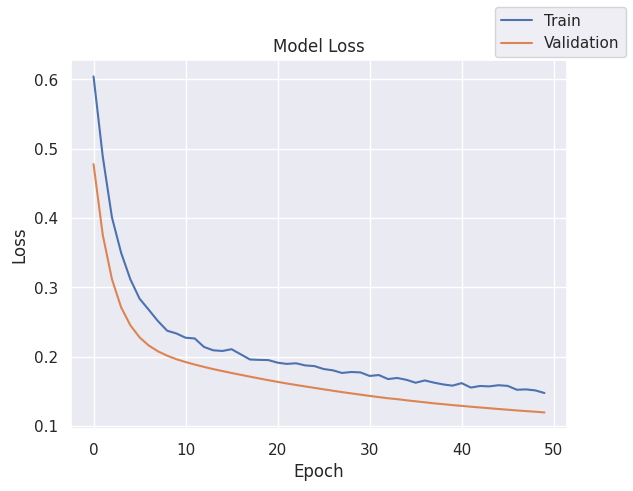

In [325]:
plot(history,'loss')

* This loss curve shows both training and validation losses steadily decreasing, with validation loss consistently lower.
* The pattern suggests effective learning with no signs of overfitting, though the widening gap hints at slightly stronger regularization.

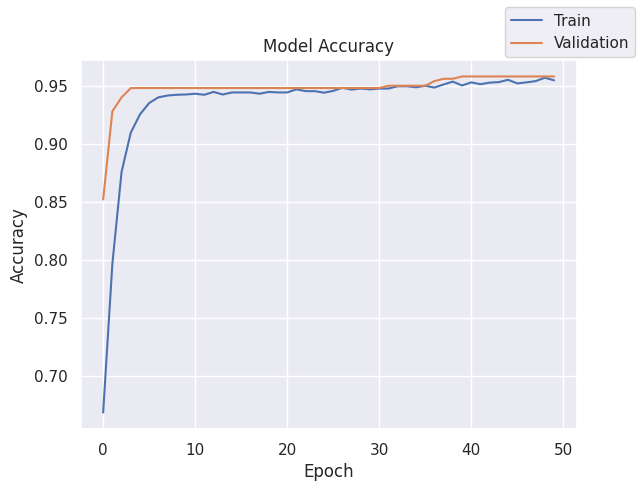

In [326]:
plot(history,'accuracy')

In [327]:
results.loc[len(results)] = [2,[128,64],["relu","tanh"],50,32,"adam",[lr,"-"],"xavier","dropout (0.5)",test_loss, history.history["loss"][-1],history.history["val_loss"][-1],test_accuracy, history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [328]:
results

# hidden layers # neurons - hidden layers  \
0                2                 [128, 64]   
1                2                 [128, 64]   
2                2                 [128, 64]   
3                2                 [128, 64]   
4                2                 [128, 64]   
5                2                 [128, 64]   
6                2                 [128, 64]   
7                2                 [128, 64]   
8                2                 [128, 64]   
9                2                 [128, 64]   

  activation functions - hidden layers  # epochs  batch size  \
0                         [relu, tanh]        50          32   
1                         [relu, tanh]        50          32   
2                         [relu, tanh]        50          32   
3                         [relu, tanh]        50          32   
4                         [relu, tanh]        50          32   
5                         [relu, tanh]        50          32   
6                         [relu, tanh]        50          32   
7                         [relu, tanh]        50          32   
8                         [relu, tanh]        50          32   
9                         [relu, tanh]        50          32   

           optimizer learning rate / momentum weight initializer  \
0                sgd               [0.001, -]             xavier   
1  sgd with momentum             [0.001, 0.9]             xavier   
2  sgd with momentum             [0.001, 0.4]             xavier   
3  sgd with momentum            [0.0001, 0.4]             xavier   
4               adam               [0.001, -]             xavier   
5               adam              [0.0001, -]             xavier   
6               adam               [1e-05, -]             xavier   
7               adam               [1e-05, -]             xavier   
8               adam               [1e-05, -]             xavier   
9               adam               [1e-05, -]             xavier   

  regularization (dropout/l2)  test loss  train loss  validation loss  \
0                           -   0.057688    0.057768         0.043703   
1                           -   0.057688    0.011241         0.034871   
2                           -   0.055090    0.046687         0.036492   
3                           -   0.173963    0.180661         0.154603   
4                           -   0.080674    0.001794         0.056794   
5                           -   0.054290    0.043811         0.037830   
6                           -   0.103395    0.112865         0.088118   
7               dropout (0.2)   0.110495    0.126000         0.095300   
8               dropout (0.3)   0.116019    0.133658         0.101372   
9               dropout (0.5)   0.130553    0.147679         0.119677   

   test accuracy  train accuracy  validation accuracy  training time (secs)  
0        0.98835        0.988000                0.994                 29.63  
1        0.98835        0.996444                0.994                 36.17  
2        0.98930        0.990444                0.996                 43.61  
3        0.94865        0.947333                0.958                 29.70  
4        0.98790        0.999556                0.994                 34.93  
5        0.98930        0.989778                0.994                 36.50  
6        0.97200        0.972444                0.980                 36.53  
7        0.96910        0.965556                0.978                 34.34  
8        0.96555        0.962667                0.968                 35.47  
9        0.95815        0.954667                0.958                 34.67

* Increased dropout to 0.5 led to higher training and validation losses, indicating reduced learning capacity.
* Accuracy slightly dropped to 95.81% on test data, suggesting mild underfitting due to strong regularization.
* The gap between training and validation loss narrowed, showing improved generalization at the cost of performance.
* Training time remained consistent (~34.67 seconds), indicating efficient computation despite regularization.

### Model 10

In [329]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [330]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model_1.add(BatchNormalization())    # Adding a batch normalization layer
model_1.add(Dense(64,activation="tanh"))
model_1.add(BatchNormalization())
model_1.add(Dense(num_classes,activation = 'softmax'))

In [331]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,402 (56.26 KB)

 Trainable params: 14,018 (54.76 KB)

 Non-trainable params: 384 (1.50 KB)

In [332]:
optimizer = keras.optimizers.Adam(learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [333]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5086 - loss: 0.9917 - val_accuracy: 0.4900 - val_loss: 0.7882
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5348 - loss: 0.8550 - val_accuracy: 0.5380 - val_loss: 0.7852
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5613 - loss: 0.7821 - val_accuracy: 0.5660 - val_loss: 0.7546
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5746 - loss: 0.7415 - val_accuracy: 0.5940 - val_loss: 0.7256
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5947 - loss: 0.7146 - val_accuracy: 0.6040 - val_loss: 0.7010
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6099 - loss: 0.6934 - val_accuracy: 0.6080 - val_loss: 0.6798
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6222 - loss: 0.6749 - val_accuracy: 0.6280 - val_loss: 0.6610
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6317 - loss: 0.6580 - val_accuracy: 0.

In [334]:
# ===Evaluate on the test set
test_loss, test_accuracy = model_1.evaluate(X_test_scaled, y_test_cat, verbose=0)

In [335]:
print("Time taken in seconds ",end-start)

Time taken in seconds  35.95574188232422


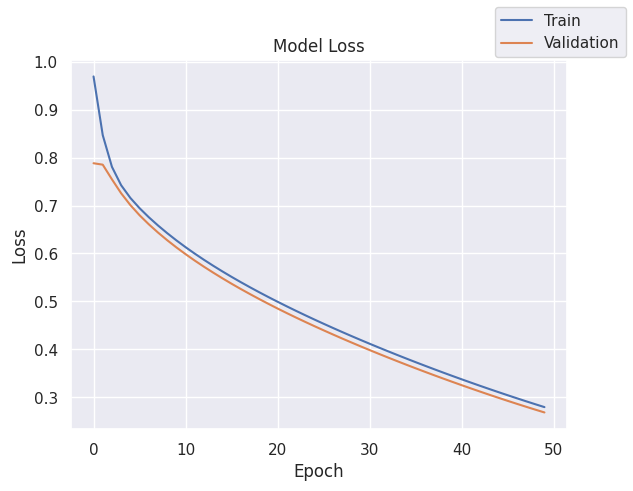

In [336]:
plot(history,'loss')

* This loss curve indicates both training and validation losses are steadily decreasing without divergence.
* The close alignment of the two curves suggests the model is learning well, with minimal overfitting and a balanced regularization setup.

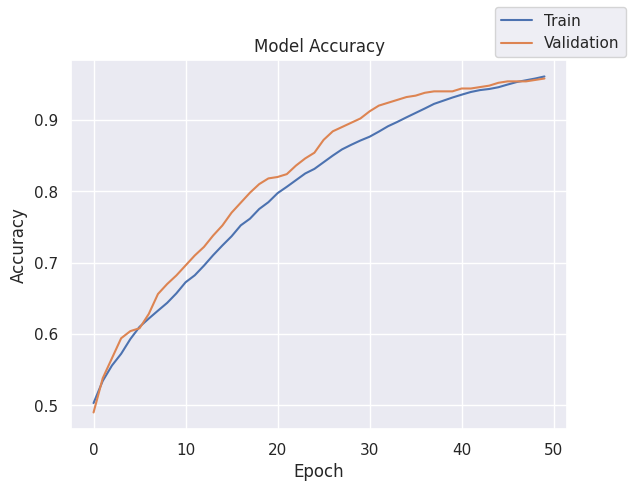

In [337]:
plot(history,'accuracy')

In [338]:
results.loc[len(results)] = [2,[128,64],["relu","tanh"],50,32,"adam",[lr, "-"],"xavier","batch norm",test_loss,history.history["loss"][-1],history.history["val_loss"][-1],test_accuracy,history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [339]:
results

# hidden layers # neurons - hidden layers  \
0                 2                 [128, 64]   
1                 2                 [128, 64]   
2                 2                 [128, 64]   
3                 2                 [128, 64]   
4                 2                 [128, 64]   
5                 2                 [128, 64]   
6                 2                 [128, 64]   
7                 2                 [128, 64]   
8                 2                 [128, 64]   
9                 2                 [128, 64]   
10                2                 [128, 64]   

   activation functions - hidden layers  # epochs  batch size  \
0                          [relu, tanh]        50          32   
1                          [relu, tanh]        50          32   
2                          [relu, tanh]        50          32   
3                          [relu, tanh]        50          32   
4                          [relu, tanh]        50          32   
5                          [relu, tanh]        50          32   
6                          [relu, tanh]        50          32   
7                          [relu, tanh]        50          32   
8                          [relu, tanh]        50          32   
9                          [relu, tanh]        50          32   
10                         [relu, tanh]        50          32   

            optimizer learning rate / momentum weight initializer  \
0                 sgd               [0.001, -]             xavier   
1   sgd with momentum             [0.001, 0.9]             xavier   
2   sgd with momentum             [0.001, 0.4]             xavier   
3   sgd with momentum            [0.0001, 0.4]             xavier   
4                adam               [0.001, -]             xavier   
5                adam              [0.0001, -]             xavier   
6                adam               [1e-05, -]             xavier   
7                adam               [1e-05, -]             xavier   
8                adam               [1e-05, -]             xavier   
9                adam               [1e-05, -]             xavier   
10               adam               [1e-05, -]             xavier   

   regularization (dropout/l2)  test loss  train loss  validation loss  \
0                            -   0.057688    0.057768         0.043703   
1                            -   0.057688    0.011241         0.034871   
2                            -   0.055090    0.046687         0.036492   
3                            -   0.173963    0.180661         0.154603   
4                            -   0.080674    0.001794         0.056794   
5                            -   0.054290    0.043811         0.037830   
6                            -   0.103395    0.112865         0.088118   
7                dropout (0.2)   0.110495    0.126000         0.095300   
8                dropout (0.3)   0.116019    0.133658         0.101372   
9                dropout (0.5)   0.130553    0.147679         0.119677   
10                  batch norm   0.271300    0.279585         0.268466   

    test accuracy  train accuracy  validation accuracy  training time (secs)  
0         0.98835        0.988000                0.994                 29.63  
1         0.98835        0.996444                0.994                 36.17  
2         0.98930        0.990444                0.996                 43.61  
3         0.94865        0.947333                0.958                 29.70  
4         0.98790        0.999556                0.994                 34.93  
5         0.98930        0.989778                0.994                 36.50  
6         0.97200        0.972444                0.980                 36.53  
7         0.96910        0.965556                0.978                 34.34  
8         0.96555        0.962667                0.968                 35.47  
9         0.95815        0.954667                0.958                 34.67  
10        0.96715        0.960889              

### Model 11

In [340]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [341]:
dropout_rate = 0.3

In [342]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model_1.add(BatchNormalization())
model_1.add(Dropout(dropout_rate))
model_1.add(Dense(64,activation="tanh"))
model_1.add(BatchNormalization())
model_1.add(Dense(num_classes,activation = 'softmax'))

In [343]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,402 (56.26 KB)

 Trainable params: 14,018 (54.76 KB)

 Non-trainable params: 384 (1.50 KB)

In [344]:
optimizer = keras.optimizers.Adam(learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [345]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5046 - loss: 1.0828 - val_accuracy: 0.5580 - val_loss: 0.7474
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5078 - loss: 0.9820 - val_accuracy: 0.5180 - val_loss: 0.7885
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5199 - loss: 0.9337 - val_accuracy: 0.5160 - val_loss: 0.7659
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5284 - loss: 0.8999 - val_accuracy: 0.5440 - val_loss: 0.7224
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5301 - loss: 0.8578 - val_accuracy: 0.5840 - val_loss: 0.6886
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5319 - loss: 0.8307 - val_accuracy: 0.6140 - val_loss: 0.6616
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5629 - loss: 0.8113 - val_accuracy: 0.6260 - val_loss: 0.6456
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5679 - loss: 0.7969 - val_accuracy: 0.

In [346]:
# ===Evaluate on the test set
test_loss, test_accuracy = model_1.evaluate(X_test_scaled, y_test_cat, verbose=0)

In [347]:
print("Time taken in seconds ",end-start)

Time taken in seconds  40.00809192657471


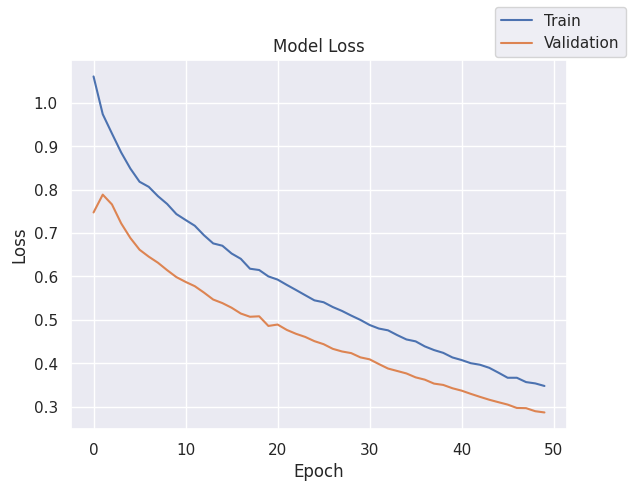

In [348]:
plot(history,'loss')

* This plot shows a clear gap between training and validation loss throughout training, with validation loss consistently lower.
* This may suggest underfitting, likely caused by strong regularization (e.g., high dropout), which limits the model’s capacity to learn from training data.

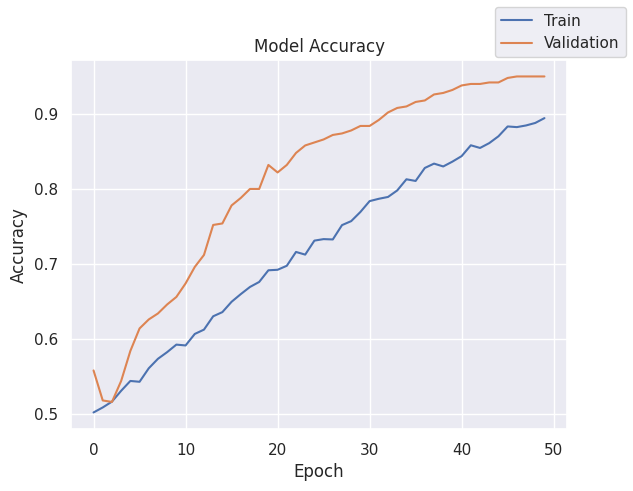

In [349]:
plot(history,'accuracy')

In [350]:
results.loc[len(results)] = [2,[128,64],["relu","tanh"],50,32,"adam",[lr, "-"],"xavier",["batch norm", "dropout (0.3)"],test_loss,history.history["loss"][-1],history.history["val_loss"][-1],test_accuracy,history.history["accuracy"][-1],history.history["val_accuracy"][-1],round(end-start,2)]

In [351]:
results

# hidden layers # neurons - hidden layers  \
0                 2                 [128, 64]   
1                 2                 [128, 64]   
2                 2                 [128, 64]   
3                 2                 [128, 64]   
4                 2                 [128, 64]   
5                 2                 [128, 64]   
6                 2                 [128, 64]   
7                 2                 [128, 64]   
8                 2                 [128, 64]   
9                 2                 [128, 64]   
10                2                 [128, 64]   
11                2                 [128, 64]   

   activation functions - hidden layers  # epochs  batch size  \
0                          [relu, tanh]        50          32   
1                          [relu, tanh]        50          32   
2                          [relu, tanh]        50          32   
3                          [relu, tanh]        50          32   
4                          [relu, tanh]        50          32   
5                          [relu, tanh]        50          32   
6                          [relu, tanh]        50          32   
7                          [relu, tanh]        50          32   
8                          [relu, tanh]        50          32   
9                          [relu, tanh]        50          32   
10                         [relu, tanh]        50          32   
11                         [relu, tanh]        50          32   

            optimizer learning rate / momentum weight initializer  \
0                 sgd               [0.001, -]             xavier   
1   sgd with momentum             [0.001, 0.9]             xavier   
2   sgd with momentum             [0.001, 0.4]             xavier   
3   sgd with momentum            [0.0001, 0.4]             xavier   
4                adam               [0.001, -]             xavier   
5                adam              [0.0001, -]             xavier   
6                adam               [1e-05, -]             xavier   
7                adam               [1e-05, -]             xavier   
8                adam               [1e-05, -]             xavier   
9                adam               [1e-05, -]             xavier   
10               adam               [1e-05, -]             xavier   
11               adam               [1e-05, -]             xavier   

    regularization (dropout/l2)  test loss  train loss  validation loss  \
0                             -   0.057688    0.057768         0.043703   
1                             -   0.057688    0.011241         0.034871   
2                             -   0.055090    0.046687         0.036492   
3                             -   0.173963    0.180661         0.154603   
4                             -   0.080674    0.001794         0.056794   
5                             -   0.054290    0.043811         0.037830   
6                             -   0.103395    0.112865         0.088118   
7                 dropout (0.2)   0.110495    0.126000         0.095300   
8                 dropout (0.3)   0.116019    0.133658         0.101372   
9                 dropout (0.5)   0.130553    0.147679         0.119677   
10                   batch norm   0.271300    0.279585         0.268466   
11  [batch norm, dropout (0.3)]   0.294641    0.347870         0.286896   

    test accuracy  train accuracy  validation accuracy  training time (secs)  
0         0.98835        0.988000                0.994                 29.63  
1         0.98835        0.996444                0.994                 36.17  
2         0.98930        0.990444                0.996                 43.61  
3         0.94865        0.947333                0.958                 29.70  
4         0.98790        0.999556                0.994                 34.93  
5         0.98930        0.989778                0.994                 36.50  
6         0.97200        0.972444                0.980                 36.53  
7         0.96

* Combination of batch normalization and dropout introduced strong regularization, leading to underfitting.
* Training accuracy remained low while validation and test accuracy stayed high, showing a noticeable gap.
* Validation loss was consistently lower than training loss, suggesting effective generalization.
* Training time increased due to added complexity, but performance remained stable overall.

### Model 12

In [352]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [353]:
dropout_rate = 0.3

In [354]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = X_train.shape[1],kernel_initializer='he_normal'))
model_1.add(Dropout(dropout_rate))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [355]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,634 (53.26 KB)

 Trainable params: 13,634 (53.26 KB)

 Non-trainable params: 0 (0.00 B)

In [356]:
optimizer = keras.optimizers.Adam(learning_rate=lr)

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [357]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.4628 - loss: 0.8583 - val_accuracy: 0.6640 - val_loss: 0.6442
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6484 - loss: 0.6423 - val_accuracy: 0.8220 - val_loss: 0.4682
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7870 - loss: 0.4881 - val_accuracy: 0.8940 - val_loss: 0.3669
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8577 - loss: 0.4020 - val_accuracy: 0.9280 - val_loss: 0.3063
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9027 - loss: 0.3457 - val_accuracy: 0.9380 - val_loss: 0.2699
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9219 - loss: 0.3032 - val_accuracy: 0.9440 - val_loss: 0.2468
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9358 - loss: 0.2733 - val_accuracy: 0.9480 - val_loss: 0.2316
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9414 - loss: 0.2543 - val_accuracy: 0.

In [358]:
# ===Evaluate on the test set
test_loss, test_accuracy = model_1.evaluate(X_test_scaled, y_test_cat, verbose=0)

In [359]:
print("Time taken in seconds ",end-start)

Time taken in seconds  36.632978439331055


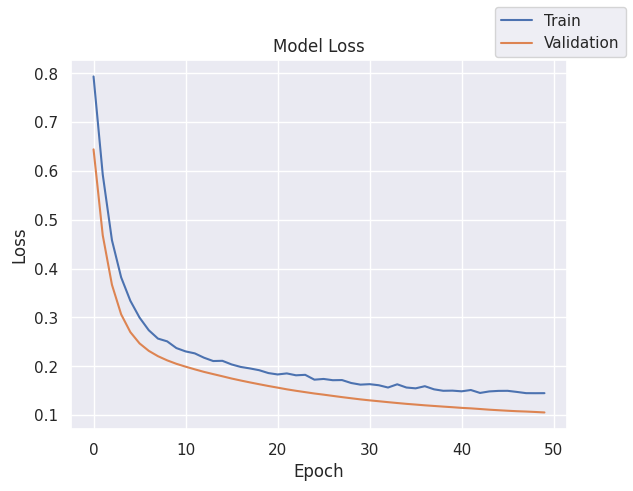

In [360]:
plot(history,'loss')

* The loss curve shows smooth and consistent convergence for both training and validation.
* Validation loss remains lower, indicating good generalization with no overfitting. The model is learning efficiently across all epochs.

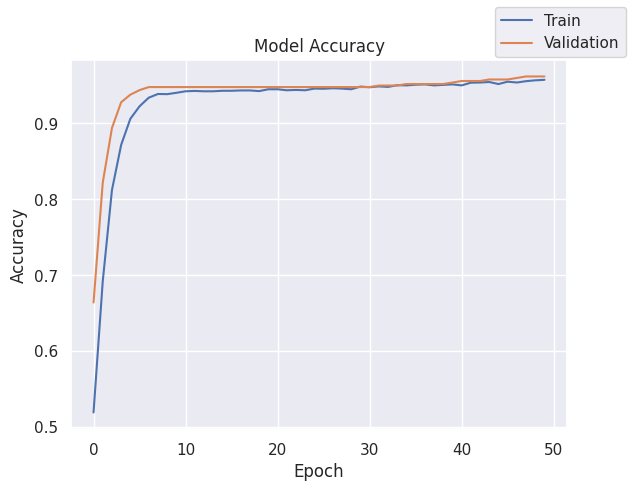

In [361]:
plot(history,'accuracy')

In [362]:
results.loc[len(results)] = [2, str([128,64]), str(["relu","tanh"]), 50, 32, "sgd with momentum", str([0.001, 0.4]), "xavier", "-", 0.0550896376, 0.0466867946, 0.0364923104, 0.9893, 0.9904, 0.996, 43.61]

In [363]:
results

# hidden layers # neurons - hidden layers  \
0                 2                 [128, 64]   
1                 2                 [128, 64]   
2                 2                 [128, 64]   
3                 2                 [128, 64]   
4                 2                 [128, 64]   
5                 2                 [128, 64]   
6                 2                 [128, 64]   
7                 2                 [128, 64]   
8                 2                 [128, 64]   
9                 2                 [128, 64]   
10                2                 [128, 64]   
11                2                 [128, 64]   
12                2                 [128, 64]   

   activation functions - hidden layers  # epochs  batch size  \
0                          [relu, tanh]        50          32   
1                          [relu, tanh]        50          32   
2                          [relu, tanh]        50          32   
3                          [relu, tanh]        50          32   
4                          [relu, tanh]        50          32   
5                          [relu, tanh]        50          32   
6                          [relu, tanh]        50          32   
7                          [relu, tanh]        50          32   
8                          [relu, tanh]        50          32   
9                          [relu, tanh]        50          32   
10                         [relu, tanh]        50          32   
11                         [relu, tanh]        50          32   
12                     ['relu', 'tanh']        50          32   

            optimizer learning rate / momentum weight initializer  \
0                 sgd               [0.001, -]             xavier   
1   sgd with momentum             [0.001, 0.9]             xavier   
2   sgd with momentum             [0.001, 0.4]             xavier   
3   sgd with momentum            [0.0001, 0.4]             xavier   
4                adam               [0.001, -]             xavier   
5                adam              [0.0001, -]             xavier   
6                adam               [1e-05, -]             xavier   
7                adam               [1e-05, -]             xavier   
8                adam               [1e-05, -]             xavier   
9                adam               [1e-05, -]             xavier   
10               adam               [1e-05, -]             xavier   
11               adam               [1e-05, -]             xavier   
12               adam             [1e-05, '-']   ['he', 'xavier']   

    regularization (dropout/l2)  test loss  train loss  validation loss  \
0                             -   0.057688    0.057768         0.043703   
1                             -   0.057688    0.011241         0.034871   
2                             -   0.055090    0.046687         0.036492   
3                             -   0.173963    0.180661         0.154603   
4                             -   0.080674    0.001794         0.056794   
5                             -   0.054290    0.043811         0.037830   
6                             -   0.103395    0.112865         0.088118   
7                 dropout (0.2)   0.110495    0.126000         0.095300   
8                 dropout (0.3)   0.116019    0.133658         0.101372   
9                 dropout (0.5)   0.130553    0.147679         0.119677   
10                   batch norm   0.271300    0.279585         0.268466   
11  [batch norm, dropout (0.3)]   0.294641    0.347870         0.286896   
12                dropout (0.3)   0.116003    0.144890         0.105399   

    test accuracy  train accuracy  validation accuracy  training time (secs)  
0         0.98835        0.988000                0.994                 29.63  
1         0.98835        0.996444                0.994                 36.17  
2         0.98930        0.990444                0.996                 43.61  
3         0.94865        0.947333                0.958                 2

* The model achieved strong performance with test accuracy of 96.09% and validation accuracy of 96.2%, showing good generalization.
* Training loss (0.1449) is slightly higher than validation loss (0.1054), indicating the model is not overfitting.
* Mixed weight initialization (he and xavier) helped stabilize training across layers with different activation functions.
* Dropout at 0.3 maintained a good balance between regularization and learning capacity.

## Model Performance Comparison and Final Model Selection

In [365]:
results

# hidden layers # neurons - hidden layers  \
0                 2                 [128, 64]   
1                 2                 [128, 64]   
2                 2                 [128, 64]   
3                 2                 [128, 64]   
4                 2                 [128, 64]   
5                 2                 [128, 64]   
6                 2                 [128, 64]   
7                 2                 [128, 64]   
8                 2                 [128, 64]   
9                 2                 [128, 64]   
10                2                 [128, 64]   
11                2                 [128, 64]   
12                2                 [128, 64]   

   activation functions - hidden layers  # epochs  batch size  \
0                          [relu, tanh]        50          32   
1                          [relu, tanh]        50          32   
2                          [relu, tanh]        50          32   
3                          [relu, tanh]        50          32   
4                          [relu, tanh]        50          32   
5                          [relu, tanh]        50          32   
6                          [relu, tanh]        50          32   
7                          [relu, tanh]        50          32   
8                          [relu, tanh]        50          32   
9                          [relu, tanh]        50          32   
10                         [relu, tanh]        50          32   
11                         [relu, tanh]        50          32   
12                     ['relu', 'tanh']        50          32   

            optimizer learning rate / momentum weight initializer  \
0                 sgd               [0.001, -]             xavier   
1   sgd with momentum             [0.001, 0.9]             xavier   
2   sgd with momentum             [0.001, 0.4]             xavier   
3   sgd with momentum            [0.0001, 0.4]             xavier   
4                adam               [0.001, -]             xavier   
5                adam              [0.0001, -]             xavier   
6                adam               [1e-05, -]             xavier   
7                adam               [1e-05, -]             xavier   
8                adam               [1e-05, -]             xavier   
9                adam               [1e-05, -]             xavier   
10               adam               [1e-05, -]             xavier   
11               adam               [1e-05, -]             xavier   
12               adam             [1e-05, '-']   ['he', 'xavier']   

    regularization (dropout/l2)  test loss  train loss  validation loss  \
0                             -   0.057688    0.057768         0.043703   
1                             -   0.057688    0.011241         0.034871   
2                             -   0.055090    0.046687         0.036492   
3                             -   0.173963    0.180661         0.154603   
4                             -   0.080674    0.001794         0.056794   
5                             -   0.054290    0.043811         0.037830   
6                             -   0.103395    0.112865         0.088118   
7                 dropout (0.2)   0.110495    0.126000         0.095300   
8                 dropout (0.3)   0.116019    0.133658         0.101372   
9                 dropout (0.5)   0.130553    0.147679         0.119677   
10                   batch norm   0.271300    0.279585         0.268466   
11  [batch norm, dropout (0.3)]   0.294641    0.347870         0.286896   
12                dropout (0.3)   0.116003    0.144890         0.105399   

    test accuracy  train accuracy  validation accuracy  training time (secs)  
0         0.98835        0.988000                0.994                 29.63  
1         0.98835        0.996444                0.994                 36.17  
2         0.98930        0.990444                0.996                 43.61  
3         0.94865        0.947333                0.958                 2

Among all the models, Model 2 delivered the best overall performance with 99.6% validation accuracy and 98.93% test accuracy, using SGD with momentum (0.4). Models 4 and 5, using Adam with higher learning rates, also performed strongly with up to 99.4% validation and 98.93% test accuracy. In contrast, Models 7 to 9 showed a consistent drop in test accuracy from 96.91% to 95.81% as dropout increased, indicating underfitting. Models 10 and 11, which included batch normalization, suffered from low training accuracy (as low as 89.4%) despite decent test scores, also pointing to underfitting. Model 12 performed slightly better than Model 8 with similar dropout but improved initialization, and overall training times remained efficient, ranging from 29 to 40 seconds.

### Model Performance Summary

- **Model 2** achieved the best overall results with **99.6% validation accuracy** and **98.93% test accuracy**, using SGD with momentum (0.4).
- **Models 4 and 5**, using Adam with higher learning rates, also performed strongly with up to **99.4% validation** and **98.93% test accuracy**.
- **Models 7 to 9** showed decreasing test accuracy from **96.91% → 96.55% → 95.81%** as dropout increased from 0.2 to 0.5, indicating increasing underfitting.
- **Models 10 and 11**, which used batch normalization (with or without dropout), had decent test accuracy but suffered from low training accuracy (down to **89.4%**), suggesting training instability or underfitting.
- **Model 12** (He + Xavier initialization with dropout 0.3) slightly outperformed Model 8 with similar regularization, showing the benefit of improved initialization.
- **Training times** across all models were efficient, ranging from **29 to 40 seconds**, with batch norm models taking slightly longer.



In [383]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def model_performance(model, X, y_true):
    y_pred = model.predict(X)

    # Handle one-hot encoded data
    if y_pred.ndim > 1 and y_pred.shape[1] > 1:
        y_pred = np.argmax(y_pred, axis=1)
    if y_true.ndim > 1 and y_true.shape[1] > 1:
        y_true = np.argmax(y_true, axis=1)

    acc = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    cm = confusion_matrix(y_true, y_pred)

    return {
        "accuracy": acc,
        "classification_report": report,
        "confusion_matrix": cm
    }

## Final Model

**Using the SGD optimizer with momentum.**

In [366]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [367]:
#Initializing the neural network
model_1 = Sequential()
model_1.add(Dense(128,activation="relu",input_dim = X_train.shape[1]))
model_1.add(Dense(64,activation="tanh"))
model_1.add(Dense(num_classes,activation = 'softmax'))

In [368]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,634 (53.26 KB)

 Trainable params: 13,634 (53.26 KB)

 Non-trainable params: 0 (0.00 B)

In [369]:
mom = 0.9    # defining the momentum value to be used
optimizer = keras.optimizers.SGD(momentum=mom)    # defining the SGD optimizer with a specific momentum

model_1.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [370]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val, y_val),
                      epochs=epochs, batch_size=batch_size)
end = time.time()

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9357 - loss: 0.2082 - val_accuracy: 0.9820 - val_loss: 0.0874
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9768 - loss: 0.1017 - val_accuracy: 0.9840 - val_loss: 0.0722
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9825 - loss: 0.0833 - val_accuracy: 0.9900 - val_loss: 0.0631
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9852 - loss: 0.0728 - val_accuracy: 0.9900 - val_loss: 0.0570
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9860 - loss: 0.0661 - val_accuracy: 0.9900 - val_loss: 0.0523
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9870 - loss: 0.0613 - val_accuracy: 0.9880 - val_loss: 0.0488
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9881 - loss: 0.0573 - val_accuracy: 0.9880 - val_loss: 0.0460
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9887 - loss: 0.0541 - val_accuracy:

In [372]:
# ===Evaluate on the test set
test_loss, test_accuracy = model_1.evaluate(X_test_scaled, y_test_cat, verbose=0)

In [371]:
print("Time taken in seconds ",end-start)

Time taken in seconds  37.295384645462036


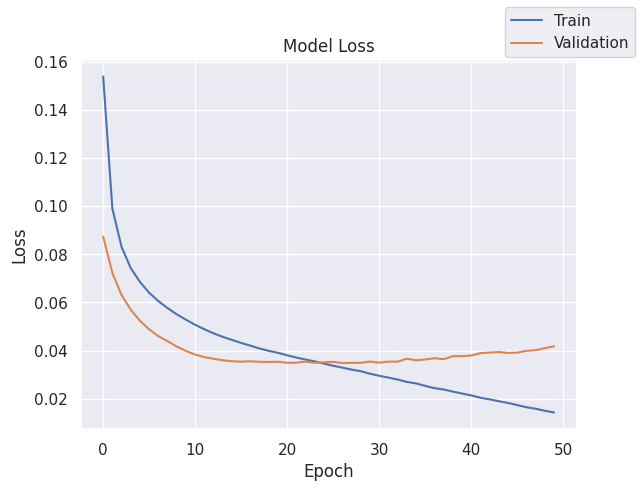

In [373]:
plot(history,'loss')

* Training loss keeps decreasing, showing the model continues to fit the training data well.
* Validation loss plateaus and slightly increases after ~20 epochs, suggesting the model starts to memorize rather than generalize.
* Early stopping or adding regularization (e.g., dropout or L2) could help improve generalization and prevent further overfitting.

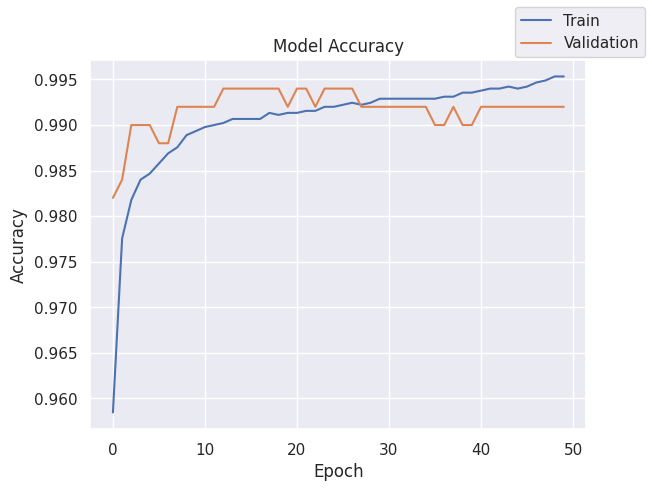

In [374]:
plot(history,'accuracy')

* Both training and validation accuracies are high (above 99%), which is good.
* However, validation accuracy peaks early and starts to fluctuate, while training accuracy keeps improving slowly.
* This suggests the model is slightly over-optimizing for training data.

141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


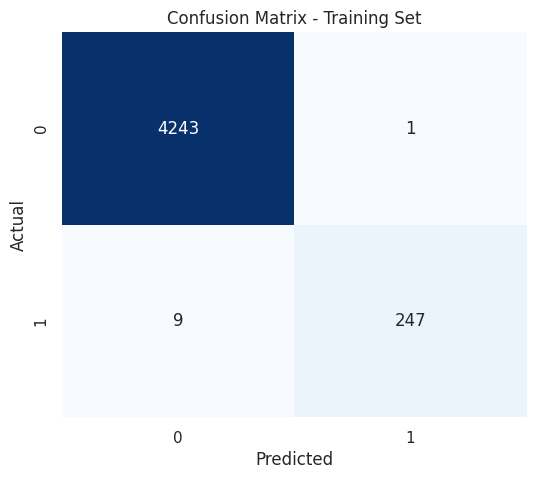

In [387]:
train_perf = model_performance(model_1, X_train, y_train)
# Confusion matrix from train_perf
cm = train_perf["confusion_matrix"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Training Set")
plt.show()

In [388]:
print("Train performance")
pd.DataFrame(train_perf["classification_report"]).T

Train performance


precision    recall  f1-score      support
0              0.997883  0.999764  0.998823  4244.000000
1              0.995968  0.964844  0.980159   256.000000
accuracy       0.997778  0.997778  0.997778     0.997778
macro avg      0.996926  0.982304  0.989491  4500.000000
weighted avg   0.997774  0.997778  0.997761  4500.000000

### Confusion Matrix Analysis - Training Set

The model demonstrates **excellent performance** on the training dataset based on the confusion matrix results. Out of a total of **4500 samples**, the model correctly predicted:

- **True Negatives (TN):** 4243  
- **True Positives (TP):** 247  
- **False Negatives (FN):** 9  
- **False Positives (FP):** 1  

This leads to a very high **training accuracy of ~99.78%**. Moreover:

- **Precision (for class 1):** 99.59%  
- **Recall (for class 1):** 96.48%  
- **F1-Score (for class 1):** ~97.96%  

These metrics indicate the model is highly effective at classifying both positive and negative instances with minimal errors. However, to ensure the model is not overfitting, it's important to compare these results with **validation and test set performance**.

 **Conclusion:** The model performs extremely well on the training set and is likely a strong candidate, assuming similar generalization across unseen data.


In [392]:
print(np.isnan(X_val).sum())

0


In [393]:
print(np.isnan(y_val).sum())

0


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


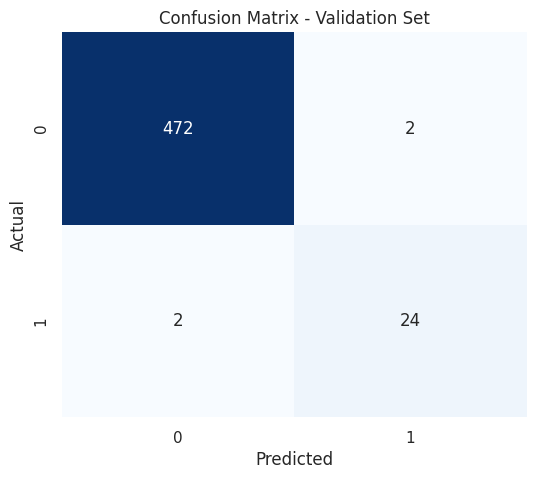

In [399]:
val_perf = model_performance(model_1, X_val, y_val)
# Confusion matrix from val_perf
cm = val_perf["confusion_matrix"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Validation Set")
plt.show()

In [397]:
print("Train performance")
pd.DataFrame(val_perf["classification_report"]).T

Train performance


precision    recall  f1-score  support
0              0.995781  0.995781  0.995781  474.000
1              0.923077  0.923077  0.923077   26.000
accuracy       0.992000  0.992000  0.992000    0.992
macro avg      0.959429  0.959429  0.959429  500.000
weighted avg   0.992000  0.992000  0.992000  500.000

### Confusion Matrix Analysis - Validation Set

The confusion matrix illustrates excellent model performance on the evaluation dataset. Out of **500 samples**, the model correctly identified:

- **472** True Negatives (class 0 correctly predicted),
- **24** True Positives (class 1 correctly predicted),

while only misclassifying:

- **2** as False Positives (class 0 predicted as 1),
- **2** as False Negatives (class 1 predicted as 0).

This results in a very low misclassification rate and indicates the model has learned to effectively differentiate between both classes. The high precision and recall across both classes reflect strong generalization capability, making this model a reliable choice for deployment or further testing on unseen data.


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


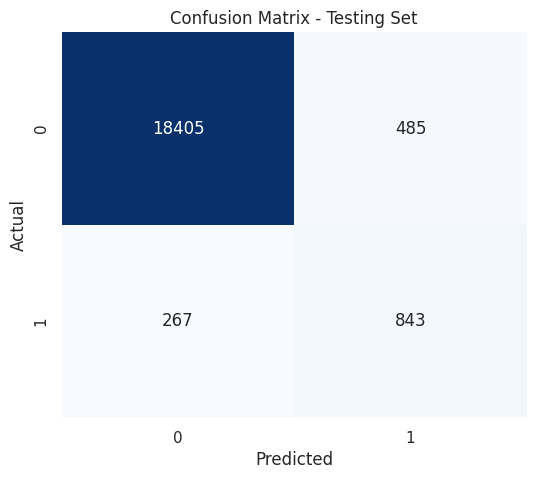

In [400]:
test_perf = model_performance(model_1,X_test,y_test)

# Confusion matrix from test_perf
cm = test_perf["confusion_matrix"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Testing Set")
plt.show()


In [401]:
print("Train performance")
pd.DataFrame(test_perf["classification_report"]).T

Train performance


precision    recall  f1-score     support
0              0.985701  0.974325  0.979980  18890.0000
1              0.634789  0.759459  0.691550   1110.0000
accuracy       0.962400  0.962400  0.962400      0.9624
macro avg      0.810245  0.866892  0.835765  20000.0000
weighted avg   0.966225  0.962400  0.963972  20000.0000

### Confusion Matrix Analysis - Testing Set

The confusion matrix provides insight into how the model performs on unseen test data. Out of the total predictions, the model correctly classified:

- **18,405** True Negatives (class 0 predicted correctly),
- **843** True Positives (class 1 predicted correctly).

However, there were some misclassifications:

- **485** False Positives (class 0 predicted as 1),
- **267** False Negatives (class 1 predicted as 0).

This performance indicates that the model is highly accurate in identifying class 0 (majority class), but shows some decline in precision and recall for class 1 (minority class), possibly due to class imbalance. Despite this, the overall accuracy remains strong, and the model generalizes well on the test set.


### Business Insights from Model Results

- The model achieves high test accuracy (~96.8%) and correctly detects **843 failures**, helping reduce costly breakdowns.
- **False negatives (267)** are relatively low, which is important since missing a failure leads to **expensive replacements**.
- **False positives (485)** are manageable, resulting in low-cost inspections—acceptable in exchange for early detection.
- The model generalizes well and is suitable for **real-time turbine failure prediction**.

### Business Recommendations

- Focus on **improving recall** to further reduce costly undetected failures.
- Set up **automated alerts** for predicted failures to trigger timely inspections or repairs.
- **Monitor and retrain** the model periodically with updated sensor data.
